In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoAODSchema
from coffea import processor
# local 
sidm_path = str(os.getcwd()).split("/sidm")[0]
#sidm_path = '/home/cms-jovyan/SIDM/'
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import sidm_processor, utilities, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')
import numpy as np

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

<Client: 'tls://192.168.202.57:8786' processes=0 threads=0, memory=0 B>

In [4]:
## loading in the samples
samples = [
    '2Mu2E_200GeV_0p25GeV_0p01mm',
    '2Mu2E_200GeV_5p0GeV_0p2mm',
    '2Mu2E_200GeV_0p25GeV_10p0mm',
    '2Mu2E_200GeV_5p0GeV_200p0mm',
    '2Mu2E_200GeV_0p25GeV_5p0mm',
    '2Mu2E_200GeV_5p0GeV_100p0mm',
    '2Mu2E_200GeV_1p2GeV_0p048mm',
    '2Mu2E_200GeV_1p2GeV_24p0mm',
    '2Mu2E_200GeV_1p2GeV_48p0mm',
    
]

## can set max_files=-1 to run over full statistics 
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor = processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    #maxchunks=1,
)


#channels = ['base', 'basenoVeto', 'basenoPixel']
#channels = ['base', 'base_v2', 'base_v3', 'base_v4', 'base_v5']
channels = ['EGammaIDStudyChannel1', 'EGammaIDStudyChannel2', 'EGammaIDStudyChannel3', 'EGammaIDStudyChannel4', 'EGammaIDStudyChannel5']
#channels = ['base']
p = sidm_processor.SidmProcessor(
    channels,
    [
        "genA_base",
        "genE_base",
        "lepton_genA_base",
        "lj_base",
        'electron_base',
        'genA_toE_base'
    ],
    unweighted_hist=True,
)

output = runner.run(fileset, treename="Events", processor_instance=p)
out = output["out"]

def returnLxy(text):
    Lxy = {
        '0.3 cm': ['0p01', '0p2', '0p048'],
        '150 cm': ['5p0', '100p0', '24p0'],
        '300 cm': ['10p0', '200p0', '48p0'],
    }
    for key in Lxy.keys():

        if text in Lxy[key]:
            return key
        else:
            continue
            
legend_entries = [s[6:] for s in samples]

def stringReplace(string):
    if 'p' in string:
        stringNew = string.replace('p', '.')
    else:
        stringNew = string
    return stringNew

Signal not in xs cfg, assuming 1fb#######] | 100% Completed | 10min 53.3s
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb
Signal not in xs cfg, assuming 1fb


In [5]:
samplesLowLxy = [samples[0], samples[1], samples[6]]
samplesHighLxy = [samples[2], samples[3], samples[4], samples[5], samples[7], samples[8]]
legend_entries = [s[6:] for s in samples]
legendEntriesLowLxy = [s[6:] for s in samplesLowLxy]
legendEntriesHighLxy = [s[6:] for s in samplesHighLxy]

## The story begins by looking at the EGM LJ momentum Estimation
## First we will see of PixelSeed, ElectronVeto, or neither affect the cross cleaning

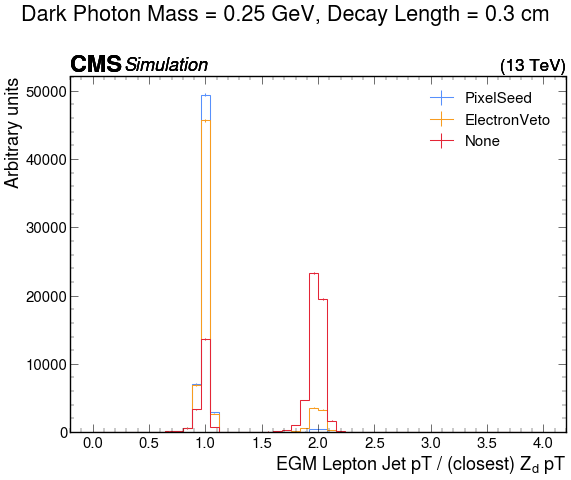

<Figure size 500x500 with 0 Axes>

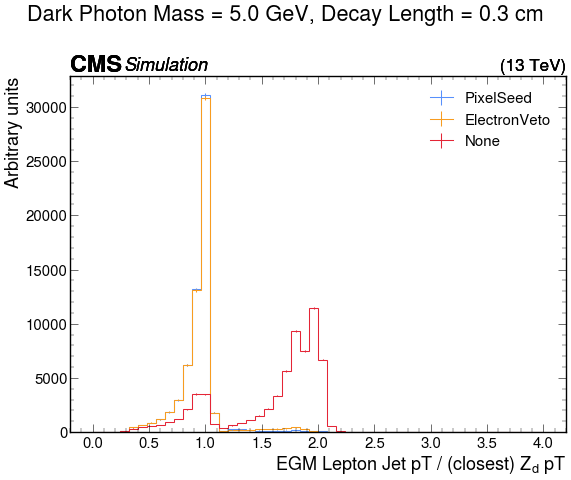

<Figure size 500x500 with 0 Axes>

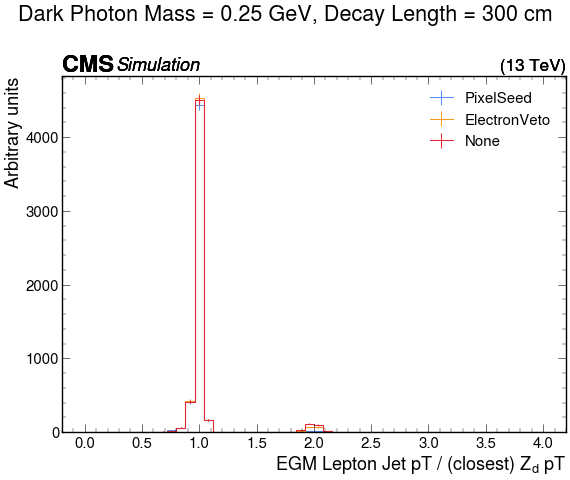

<Figure size 500x500 with 0 Axes>

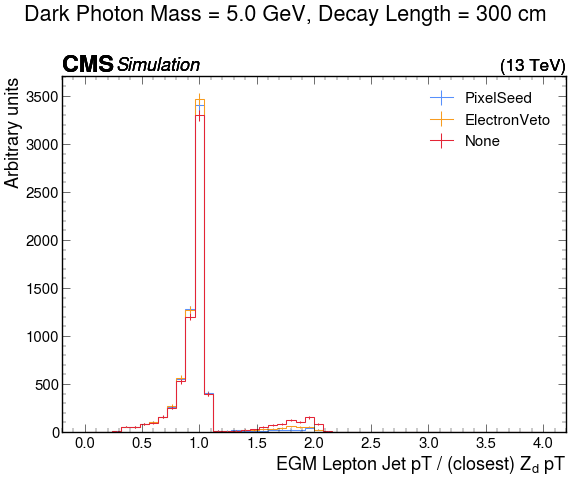

<Figure size 500x500 with 0 Axes>

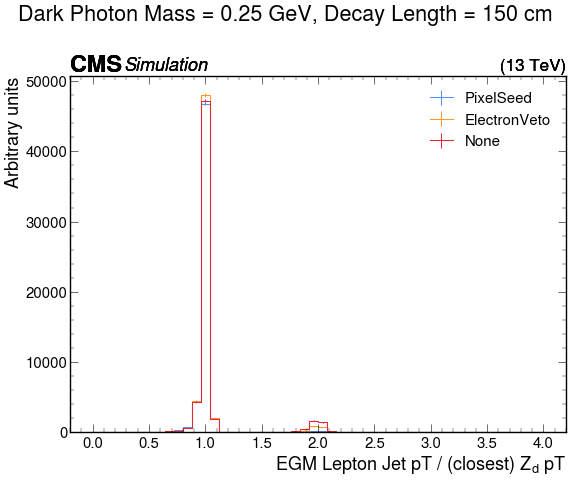

<Figure size 500x500 with 0 Axes>

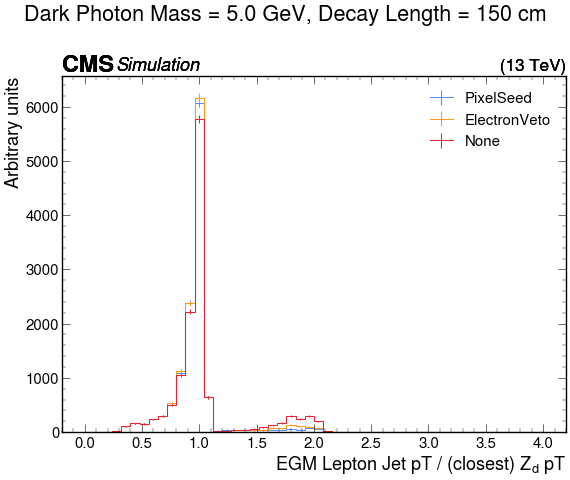

<Figure size 500x500 with 0 Axes>

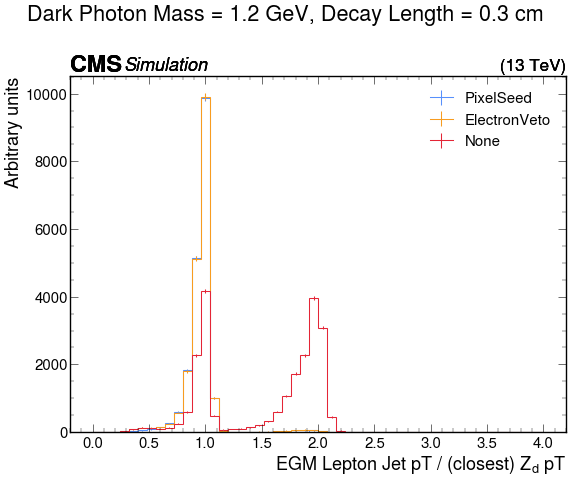

<Figure size 500x500 with 0 Axes>

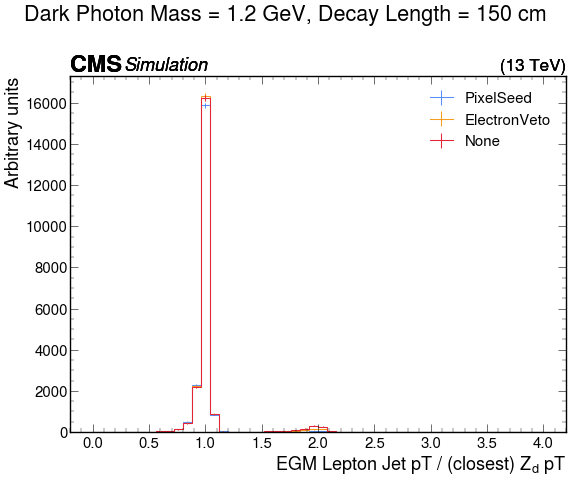

<Figure size 500x500 with 0 Axes>

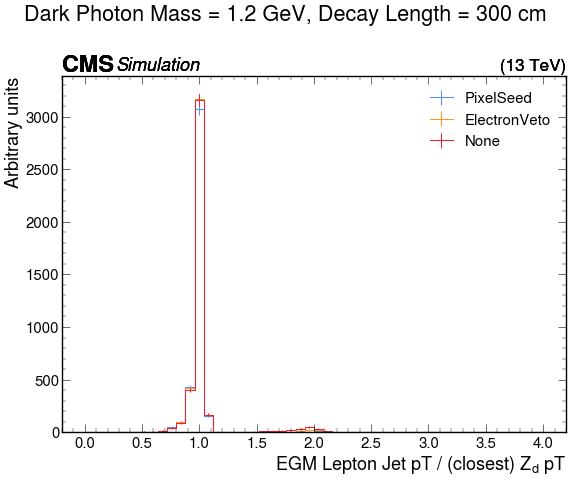

<Figure size 500x500 with 0 Axes>

In [6]:
nplots = 1

path = './momentumEstimation-LooseLoose'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon


for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[0], :], density=False, label='PixelSeed')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[4], :], density=False, label='ElectronVeto')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[3], :], density=False, label='None')
    
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    ax = plt.gca()

    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}')
    plt.tight_layout()  
   
    plt.savefig(f'{path}/plot_ljMomentum_ratios_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

## Pixel Seed Veto seems to have the strongest effect on removing double counting
## Next we will want to look at the EGM LJ reco efficiency as a function of $L_{xy}$
## To see how well we can reconstruct EGM jets with Pixel Seed Veto

<>:12: DeprecationWarning: invalid escape sequence '\g'
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


200GeV_0p25GeV_0p01mm


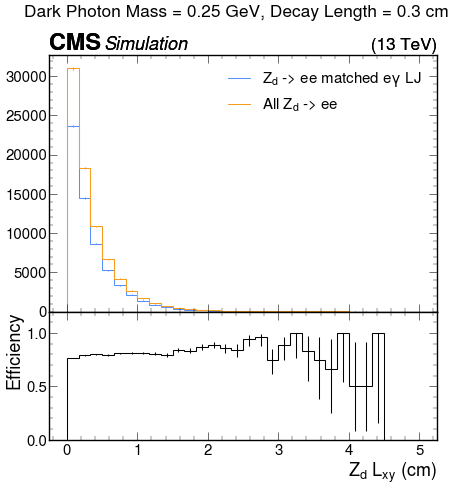

200GeV_5p0GeV_0p2mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

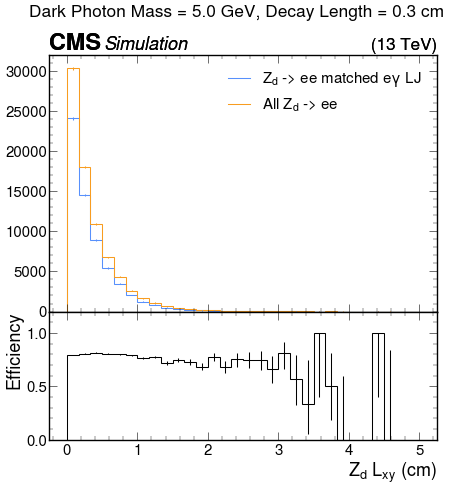

200GeV_1p2GeV_0p048mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

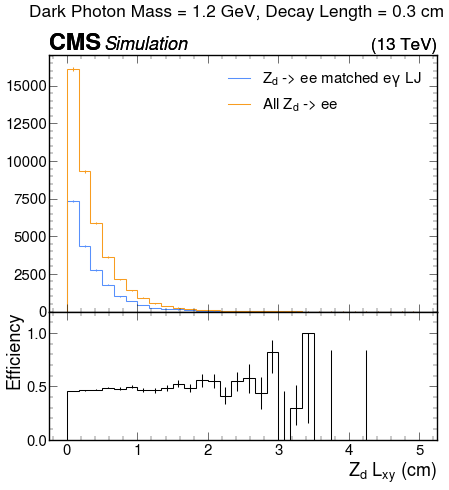

200GeV_0p25GeV_10p0mm


<Figure size 500x500 with 0 Axes>

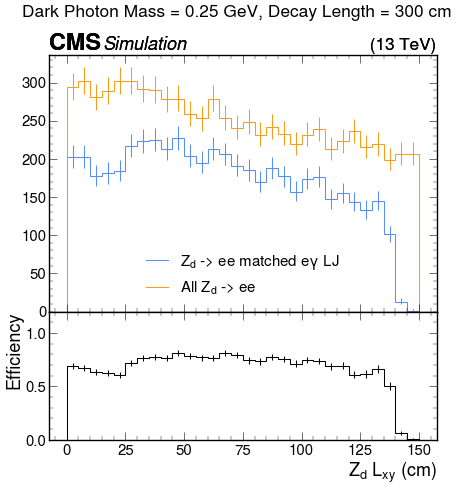

200GeV_5p0GeV_200p0mm


<Figure size 500x500 with 0 Axes>

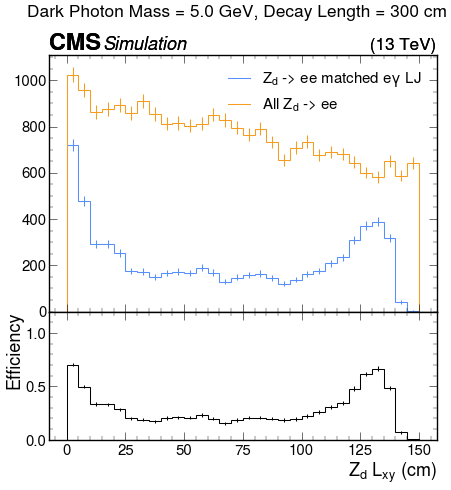

200GeV_0p25GeV_5p0mm


<Figure size 500x500 with 0 Axes>

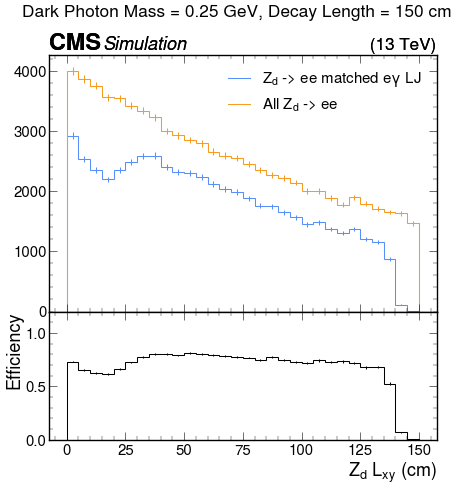

200GeV_5p0GeV_100p0mm


<Figure size 500x500 with 0 Axes>

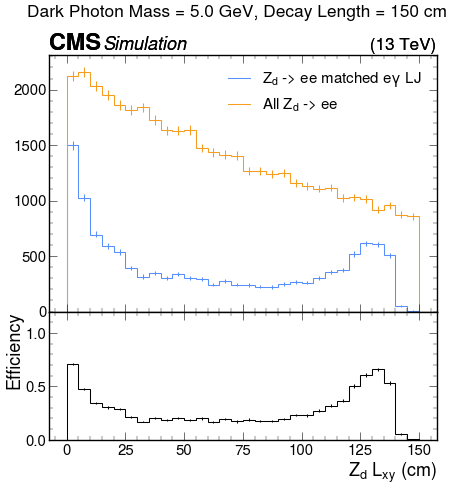

200GeV_1p2GeV_24p0mm


<Figure size 500x500 with 0 Axes>

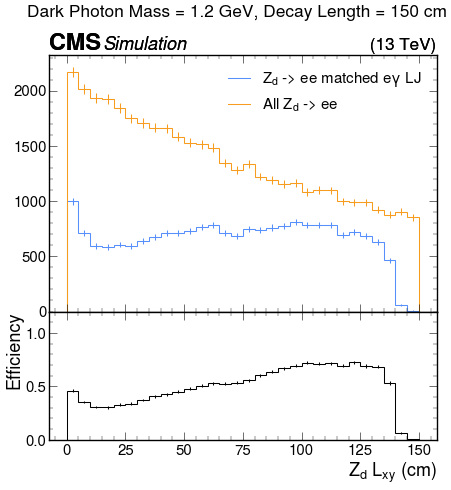

200GeV_1p2GeV_48p0mm


<Figure size 500x500 with 0 Axes>

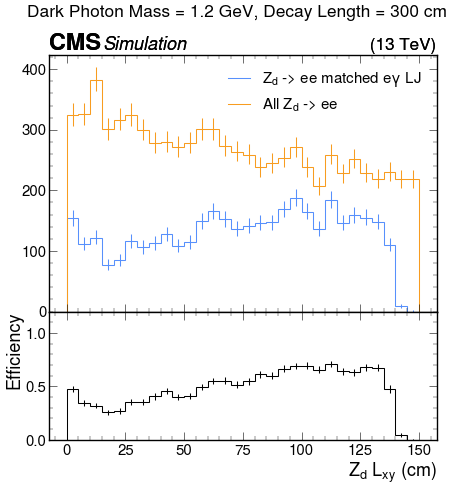

<Figure size 500x500 with 0 Axes>

In [7]:
## setting a new directory to save these plots
path = './genARatiosLooseIDs'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
for i, sample in enumerate(samplesLowLxy):
    
    print(f'{legendEntriesLowLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genAs_toE_matched_egmLj_lxy_lowRange'][channels[0], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[0], :], legend=['$Z_d$ -> ee matched e$\gamma$ LJ','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Lxy_{sample}_Loose-Loose.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

for i, sample in enumerate(samplesHighLxy):
    
    print(f'{legendEntriesHighLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genAs_toE_matched_egmLj_lxy'][channels[0], :], out[sample]["hists"]["genAs_toE_lxy"][channels[0], :], legend=['$Z_d$ -> ee matched e$\gamma$ LJ','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Lxy_{sample}_Loose-Loose.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

## We notice a strange shape in the Reco Efficiency vs $L_{xy}$ in the cases where
## $m_{Z_d}$ > 0.25 and the average lab frame $L_{xy}$ is >= 150 CM
## Lets investigate wheter this is an electron or a photon reconstruction problem
## To start, lets investigate the number of electrons and photons near $Z_d$ as a function of $L_{xy}$

## Next I want to investigate Zd reco efficiency with either a photon or electron near

200GeV_0p25GeV_0p01mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


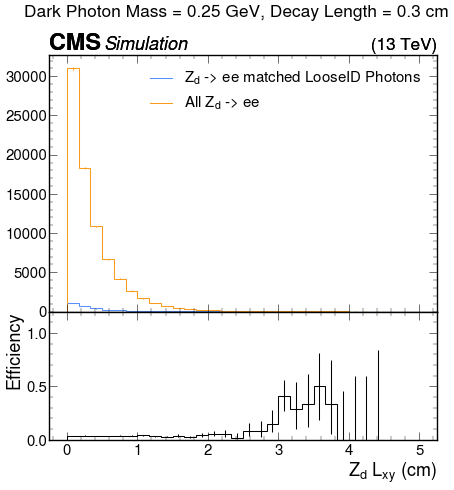

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

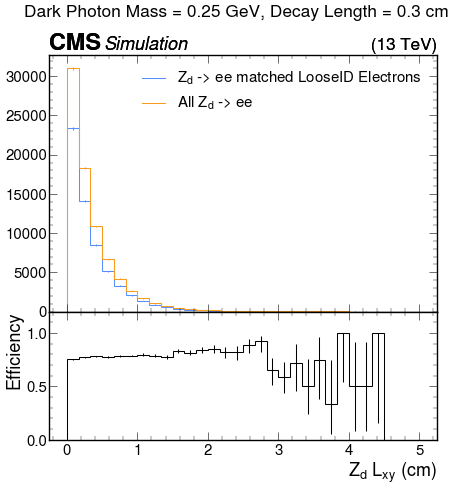

200GeV_5p0GeV_0p2mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

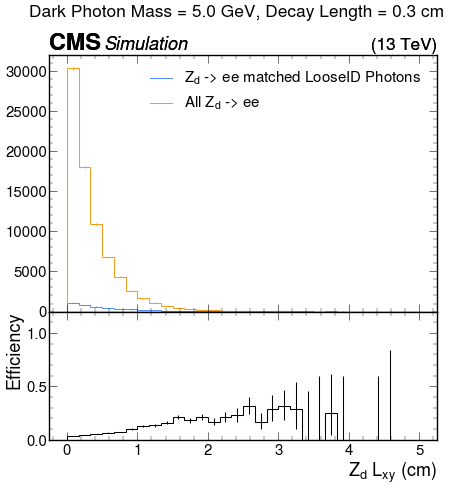

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

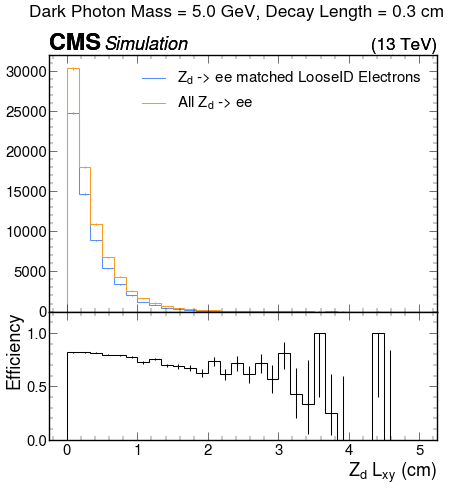

200GeV_1p2GeV_0p048mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

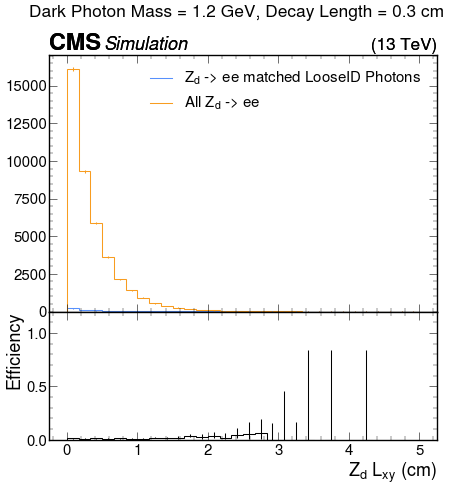

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

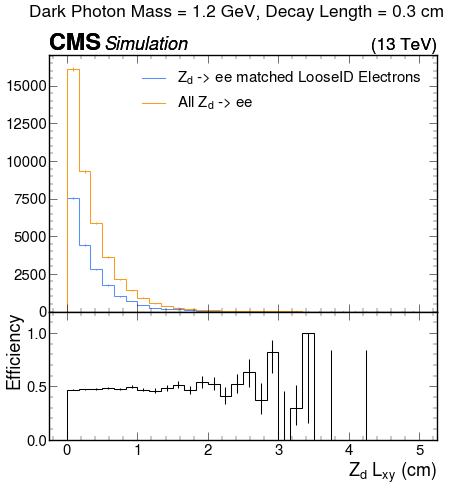

200GeV_0p25GeV_10p0mm


<Figure size 500x500 with 0 Axes>

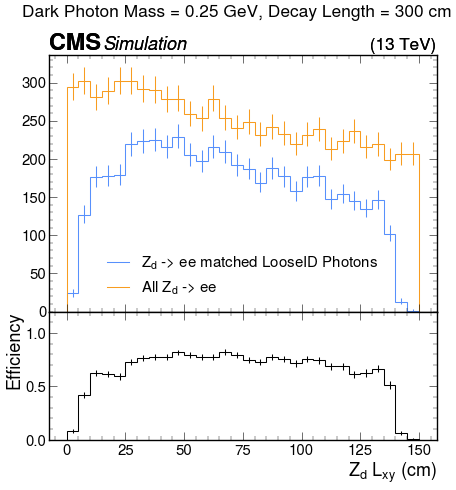

<Figure size 500x500 with 0 Axes>

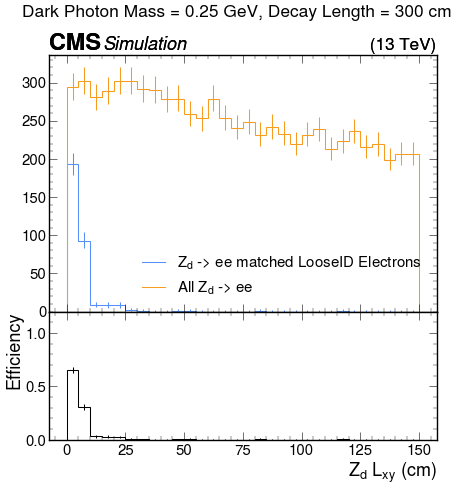

200GeV_5p0GeV_200p0mm


<Figure size 500x500 with 0 Axes>

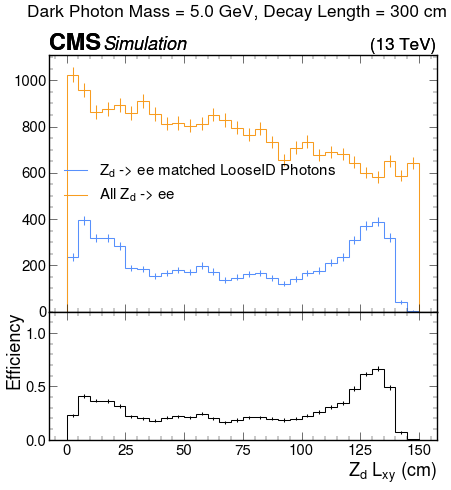

<Figure size 500x500 with 0 Axes>

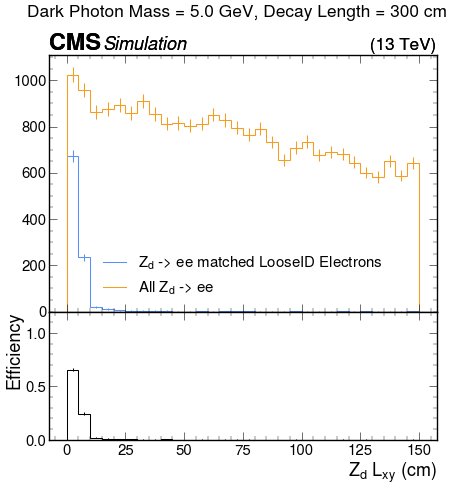

200GeV_0p25GeV_5p0mm


<Figure size 500x500 with 0 Axes>

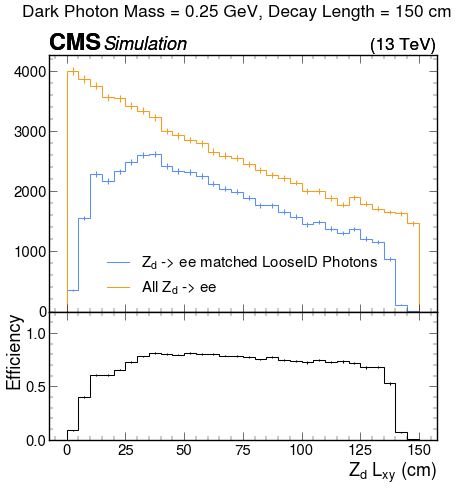

<Figure size 500x500 with 0 Axes>

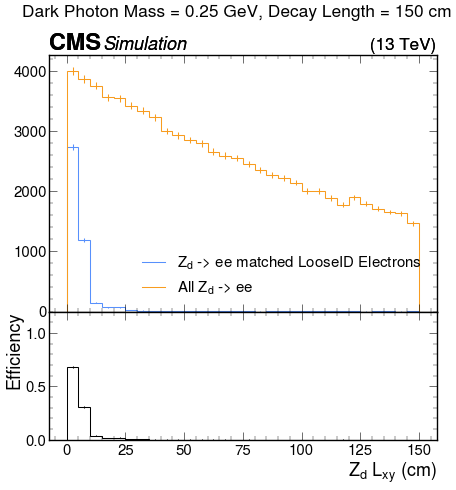

200GeV_5p0GeV_100p0mm


<Figure size 500x500 with 0 Axes>

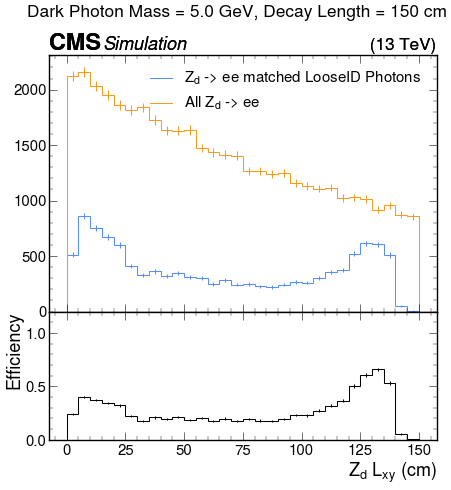

<Figure size 500x500 with 0 Axes>

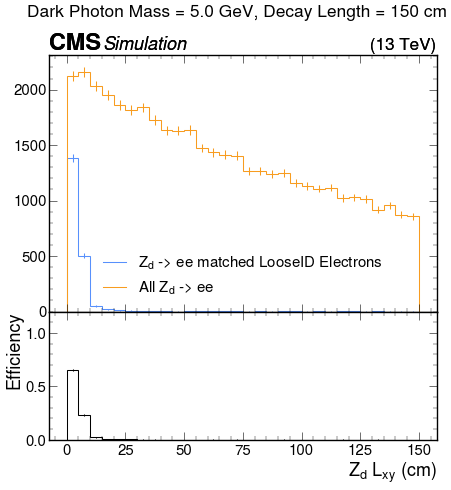

200GeV_1p2GeV_24p0mm


<Figure size 500x500 with 0 Axes>

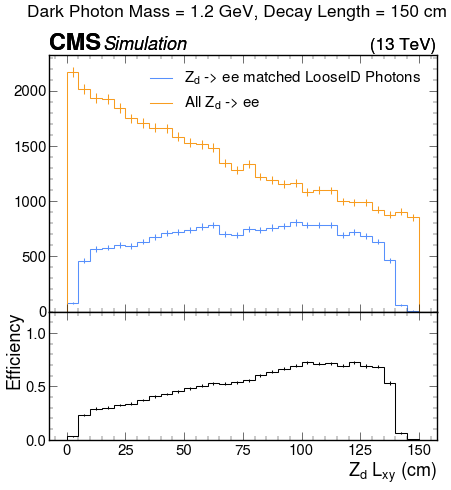

<Figure size 500x500 with 0 Axes>

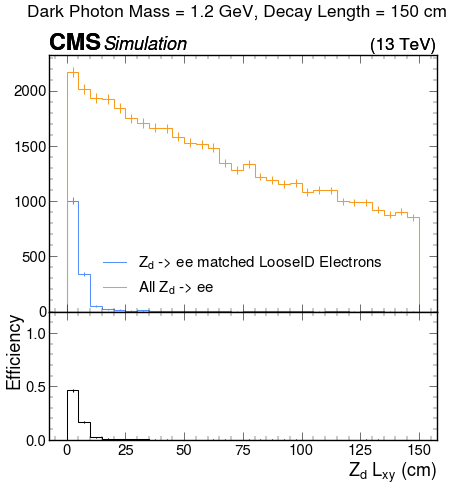

200GeV_1p2GeV_48p0mm


<Figure size 500x500 with 0 Axes>

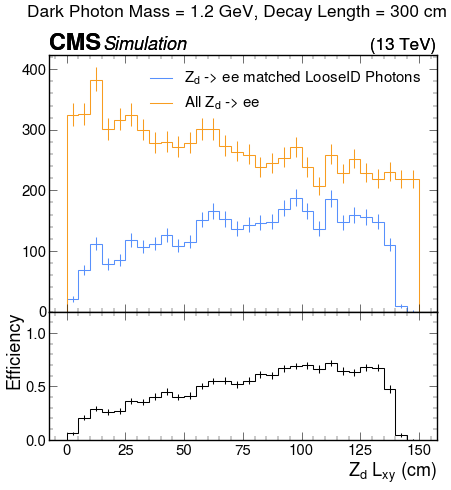

<Figure size 500x500 with 0 Axes>

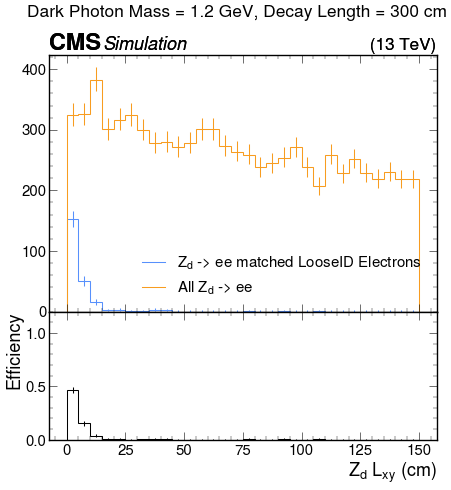

<Figure size 500x500 with 0 Axes>

In [8]:
## setting a new directory to save these plots
path = './LeptonsNearGenA_lxy'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
for i, sample in enumerate(samplesLowLxy):
    
    print(f'{legendEntriesLowLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_photons_lxyLowRange'][channels[0], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[0], :], legend=['$Z_d$ -> ee matched LooseID Photons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Photons_Lxy_{sample}_Loose-Loose.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_electrons_lxyLowRange'][channels[0], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[0], :], legend=['$Z_d$ -> ee matched LooseID Electrons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Electrons_Lxy_{sample}_Loose-Loose.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

for i, sample in enumerate(samplesHighLxy):
    
    print(f'{legendEntriesHighLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_photons_lxy'][channels[0], :], out[sample]["hists"]["genAs_toE_lxy"][channels[0], :], legend=['$Z_d$ -> ee matched LooseID Photons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Photons_Lxy_{sample}_Loose-Loose.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_electrons_lxy'][channels[0], :], out[sample]["hists"]["genAs_toE_lxy"][channels[0], :], legend=['$Z_d$ -> ee matched LooseID Electrons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Electrons_Lxy_{sample}_Loose-Loose.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

## It appears that the cause of the weird $L_{xy}$ shape is due to the Photon reconstruction
## lets try loosening some of the ID variables
## photons: relaxing PFIso and Sieie seems to resolve the issue
## electrons: switching from looseID to MVANonIsoWPL seems to resolve the issue

200GeV_0p25GeV_0p01mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


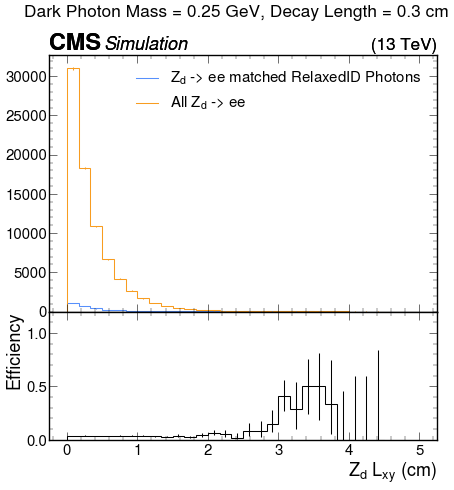

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

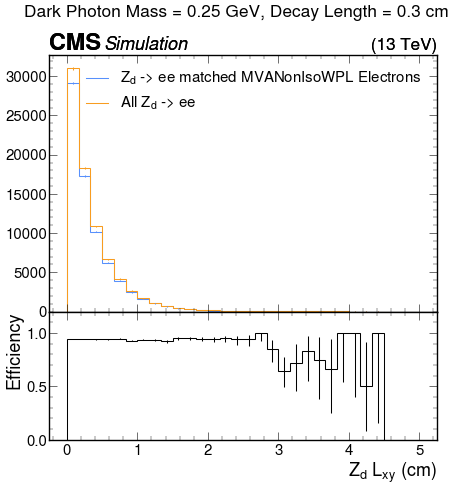

200GeV_5p0GeV_0p2mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

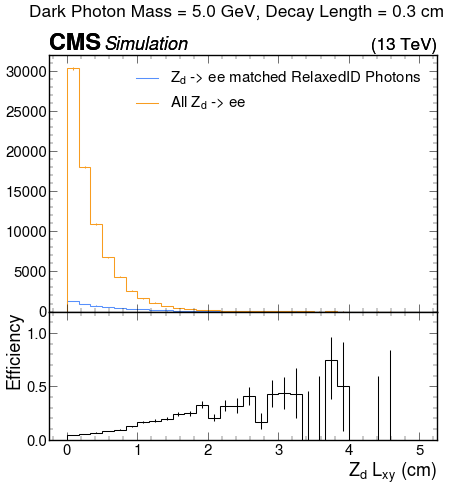

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

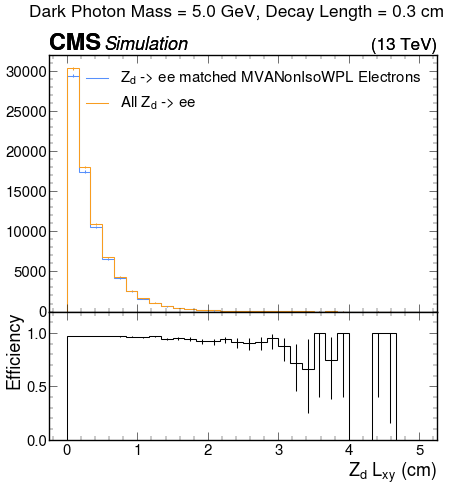

200GeV_1p2GeV_0p048mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

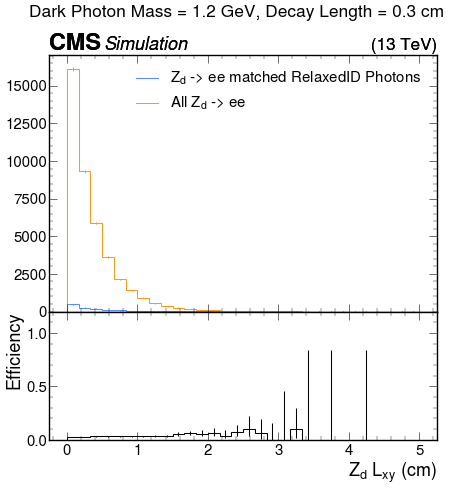

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

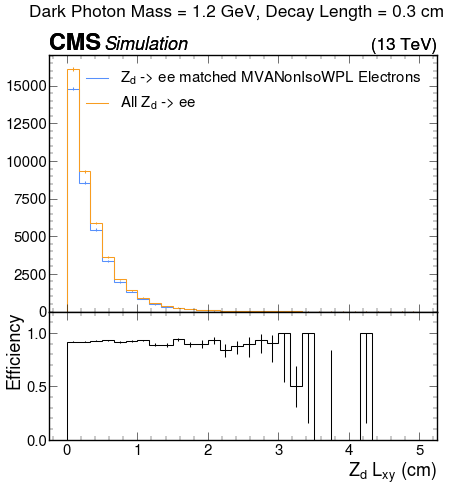

200GeV_0p25GeV_10p0mm


<Figure size 500x500 with 0 Axes>

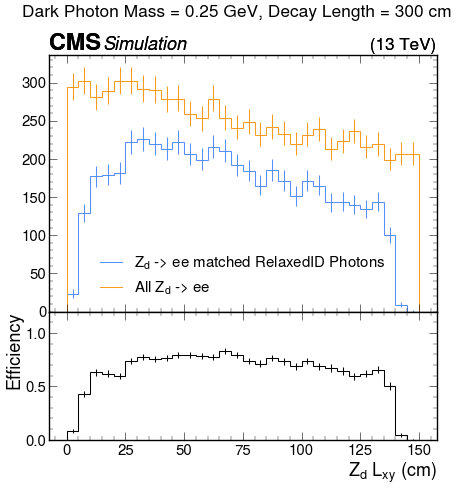

<Figure size 500x500 with 0 Axes>

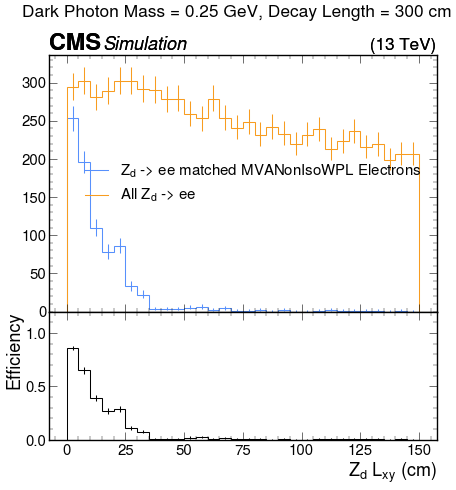

200GeV_5p0GeV_200p0mm


<Figure size 500x500 with 0 Axes>

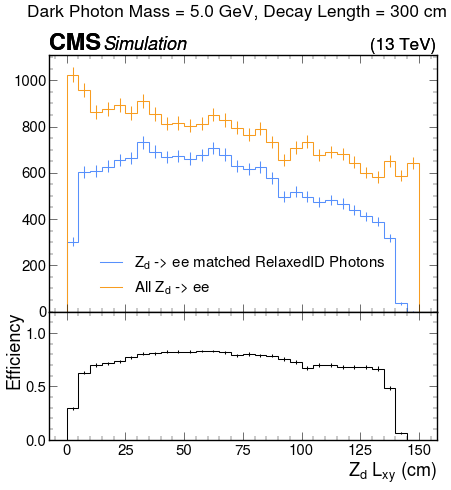

<Figure size 500x500 with 0 Axes>

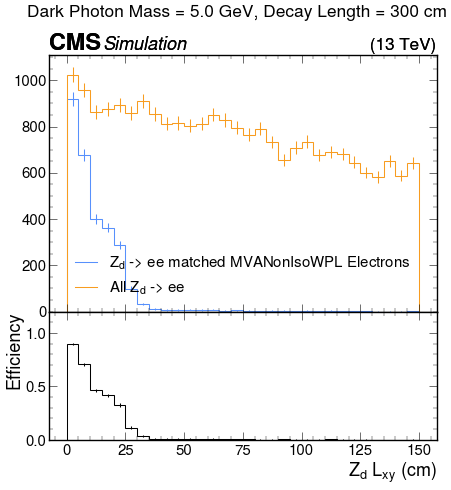

200GeV_0p25GeV_5p0mm


<Figure size 500x500 with 0 Axes>

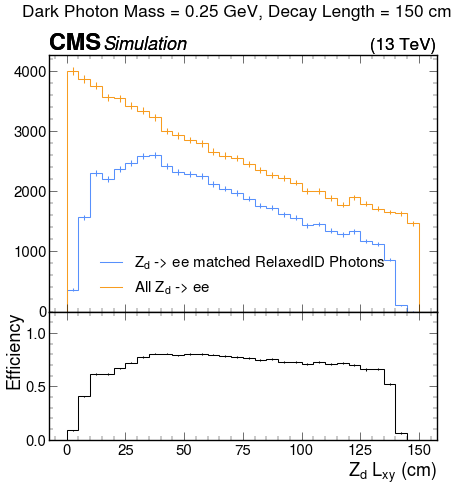

<Figure size 500x500 with 0 Axes>

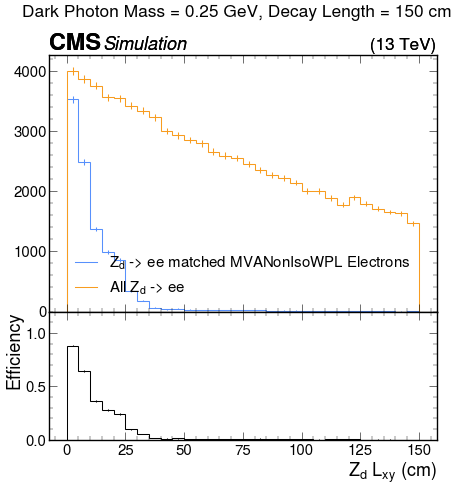

200GeV_5p0GeV_100p0mm


<Figure size 500x500 with 0 Axes>

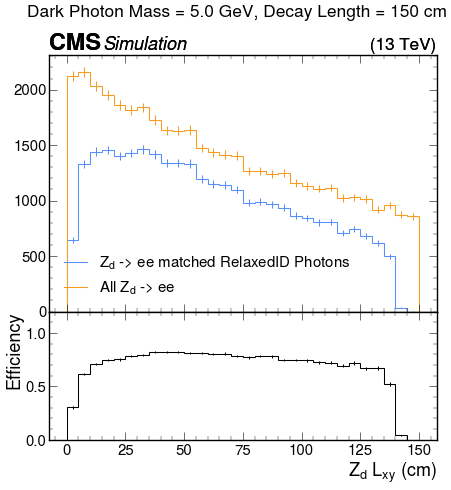

<Figure size 500x500 with 0 Axes>

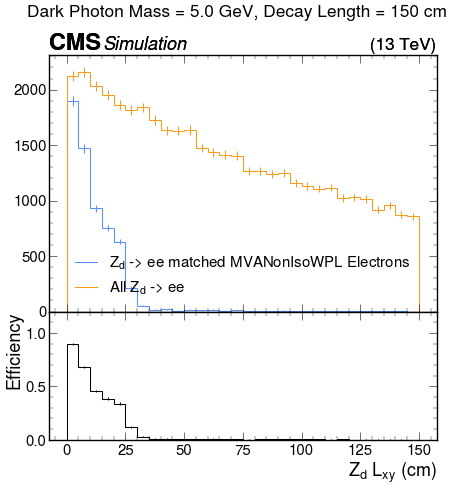

200GeV_1p2GeV_24p0mm


<Figure size 500x500 with 0 Axes>

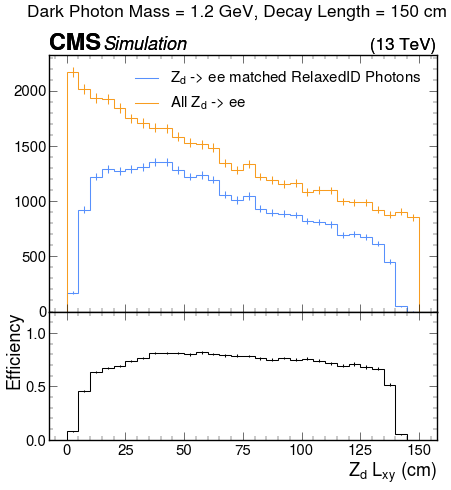

<Figure size 500x500 with 0 Axes>

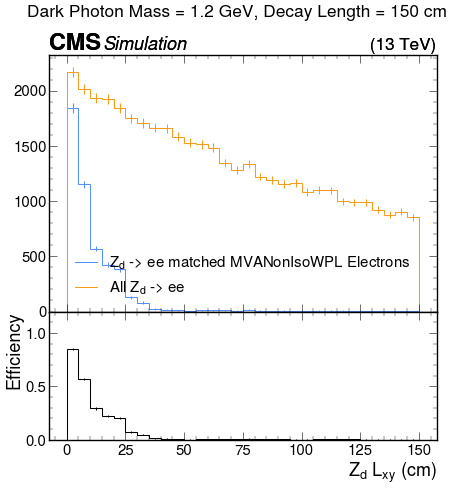

200GeV_1p2GeV_48p0mm


<Figure size 500x500 with 0 Axes>

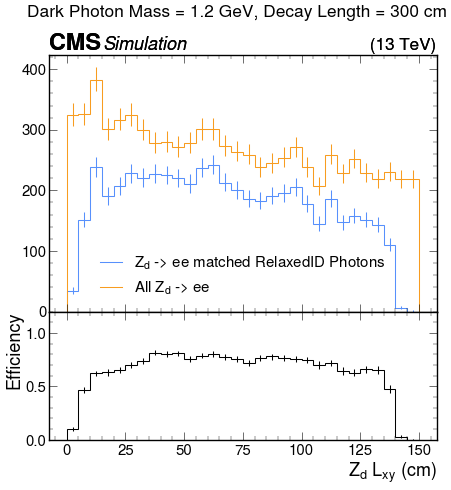

<Figure size 500x500 with 0 Axes>

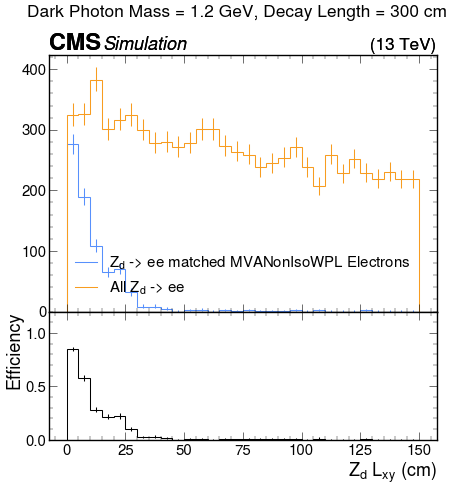

<Figure size 500x500 with 0 Axes>

In [9]:
## setting a new directory to save these plots
path = './LeptonsNearGenA_lxy'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
for i, sample in enumerate(samplesLowLxy):
    
    print(f'{legendEntriesLowLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_photons_lxyLowRange'][channels[1], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[1], :], legend=['$Z_d$ -> ee matched RelaxedID Photons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Photons_Lxy_{sample}_Relaxed.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_electrons_lxyLowRange'][channels[1], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[1], :], legend=['$Z_d$ -> ee matched MVANonIsoWPL Electrons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Electrons_Lxy_{sample}_Relaxed.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

for i, sample in enumerate(samplesHighLxy):
    
    print(f'{legendEntriesHighLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_photons_lxy'][channels[1], :], out[sample]["hists"]["genAs_toE_lxy"][channels[1], :], legend=['$Z_d$ -> ee matched RelaxedID Photons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Photons_Lxy_{sample}_Relaxed.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()
    utilities.plot_ratio(out[sample]["hists"]['genA_toE_matched_electrons_lxy'][channels[1], :], out[sample]["hists"]["genAs_toE_lxy"][channels[1], :], legend=['$Z_d$ -> ee matched MVANonIsoWPL Electrons','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Electrons_Lxy_{sample}_Relaxed.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

## Lets investigate why the shape of the $L_{xy}$ distribution was improved
## we can start by looking at where in $\Delta R(e_{gen}, e_{gen})$ we see improvement
## this was done by finding $\Delta R(e_{gen}, e_{gen})$ from $Z_d$ -> ee decay with Photon near in Radius of 0.4

In [10]:
samples = [
    '2Mu2E_200GeV_0p25GeV_0p01mm',
    '2Mu2E_200GeV_5p0GeV_0p2mm',
    '2Mu2E_200GeV_0p25GeV_10p0mm',
    '2Mu2E_200GeV_5p0GeV_200p0mm',
    '2Mu2E_200GeV_0p25GeV_5p0mm',
    '2Mu2E_200GeV_5p0GeV_100p0mm',
    '2Mu2E_200GeV_1p2GeV_0p048mm',
    '2Mu2E_200GeV_1p2GeV_24p0mm',
    '2Mu2E_200GeV_1p2GeV_48p0mm',
    
]

samplesXLR = ['2Mu2E_200GeV_0p25GeV_0p01mm', '2Mu2E_200GeV_0p25GeV_5p0mm', '2Mu2E_200GeV_0p25GeV_10p0mm']
samplesLR = ['2Mu2E_200GeV_1p2GeV_0p048mm',  '2Mu2E_200GeV_1p2GeV_24p0mm', '2Mu2E_200GeV_1p2GeV_48p0mm']
samplesNR = ['2Mu2E_200GeV_5p0GeV_0p2mm', '2Mu2E_200GeV_5p0GeV_100p0mm', '2Mu2E_200GeV_5p0GeV_200p0mm']

<>:10: DeprecationWarning: invalid escape sequence '\D'


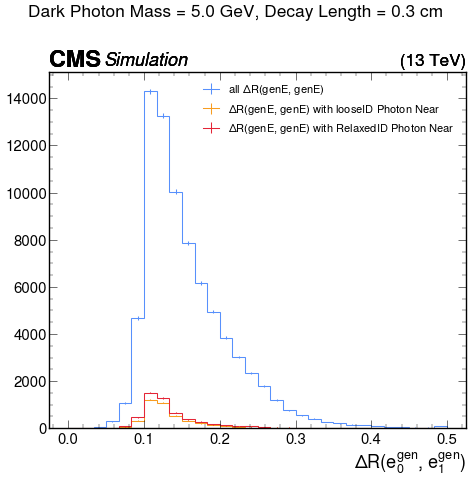

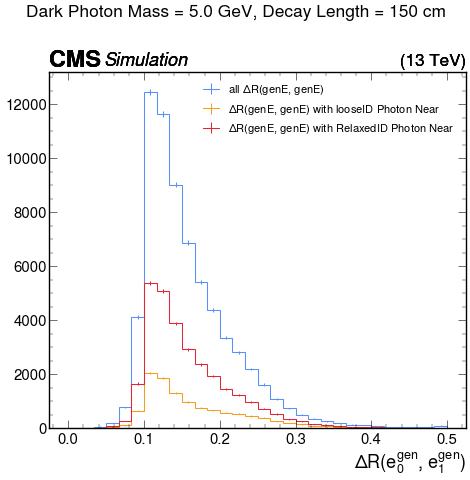

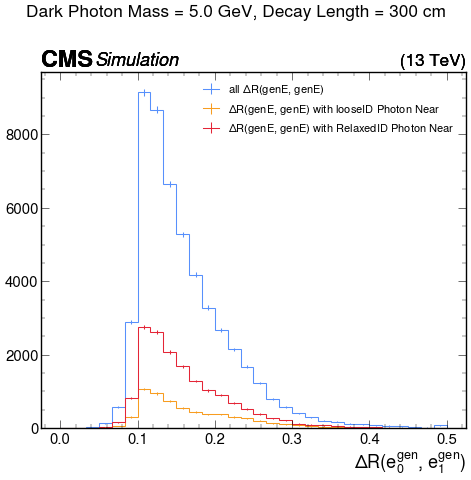

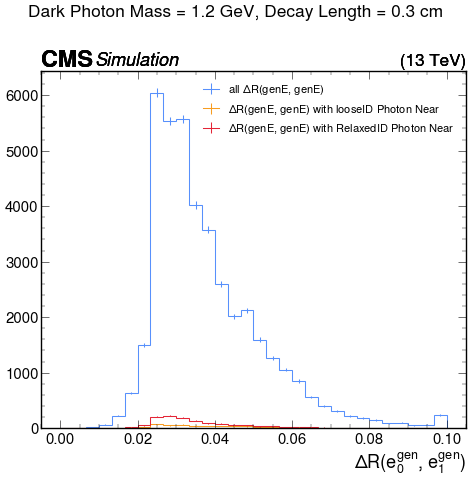

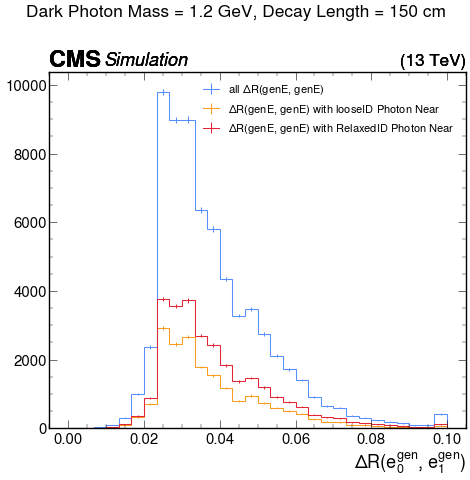

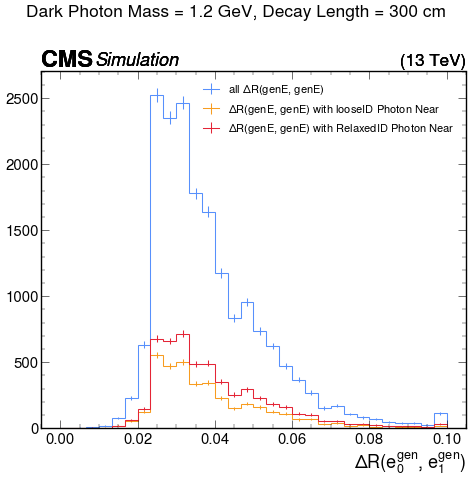

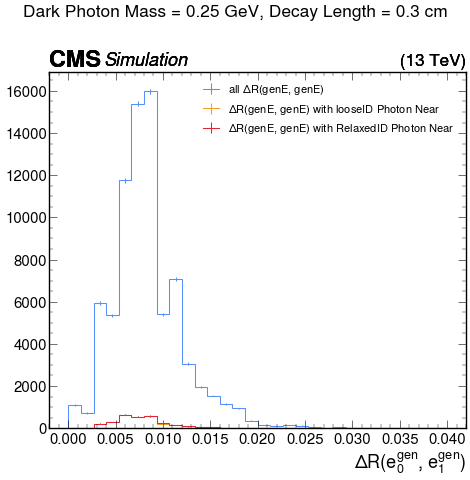

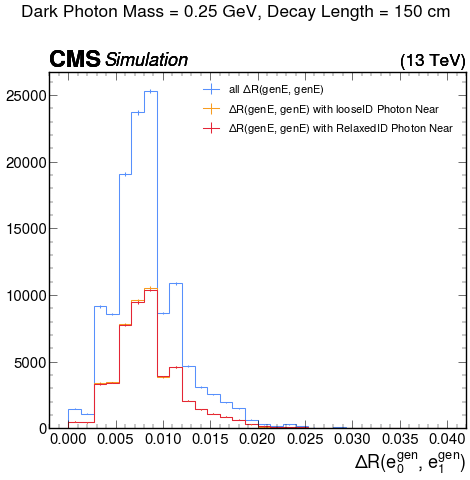

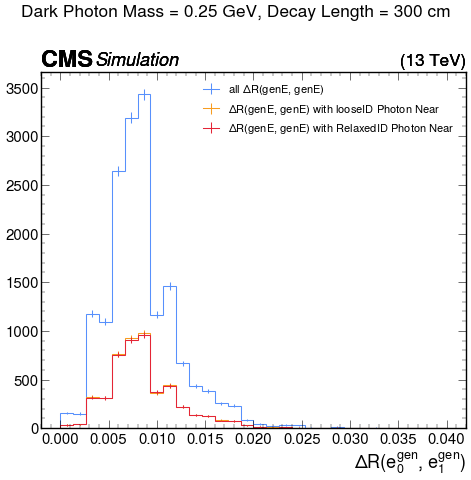

<Figure size 500x500 with 0 Axes>

In [11]:
## setting a new directory to save these plots
path = './genEDRs'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
for i, sample in enumerate(samplesNR):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genE_genE_dR"][channels[0], :], density=False, label='all $\Delta$R(genE, genE)')
    utilities.plot(out[sample]["hists"]["genE_genE_dR_matched_Photon"][channels[0], :], density=False, label='$\Delta$R(genE, genE) with looseID Photon Near')
    utilities.plot(out[sample]["hists"]["genE_genE_dR_matched_Photon"][channels[1], :], density=False, label='$\Delta$R(genE, genE) with RelaxedID Photon Near')
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.legend(loc='upper right', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{path}/genE_genE_dR_{sample}.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()
    
for i, sample in enumerate(samplesLR):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genE_genE_dR_XLowRange"][channels[0], :], density=False, label='all $\Delta$R(genE, genE)')
    utilities.plot(out[sample]["hists"]["genE_genE_dR_matched_Photon_lowRange"][channels[0], :], density=False, label='$\Delta$R(genE, genE) with looseID Photon Near')
    utilities.plot(out[sample]["hists"]["genE_genE_dR_matched_Photon_lowRange"][channels[1], :], density=False, label='$\Delta$R(genE, genE) with RelaxedID Photon Near')
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.legend(loc='upper right', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{path}/genE_genE_dR_{sample}.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

for i, sample in enumerate(samplesXLR):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genE_genE_dR_XXLowRange"][channels[0], :], density=False, label='all $\Delta$R(genE, genE)')
    utilities.plot(out[sample]["hists"]["genE_genE_dR_matched_Photon_XLowRange"][channels[0], :], density=False, label='$\Delta$R(genE, genE) with looseID Photon Near')
    utilities.plot(out[sample]["hists"]["genE_genE_dR_matched_Photon_XLowRange"][channels[1], :], density=False, label='$\Delta$R(genE, genE) with RelaxedID Photon Near')
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.legend(loc='upper right', fontsize=16)
    plt.tight_layout()
    plt.savefig(f'{path}/genE_genE_dR_{sample}.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

## The improvement seems to be largely where we are less collimated, i.e. in heavier $m_{Z_d}$

## Finally, we can look at the Reco Efficiency as a function of $L_{xy}$ given the new IDs

<>:12: DeprecationWarning: invalid escape sequence '\g'
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


200GeV_0p25GeV_0p01mm


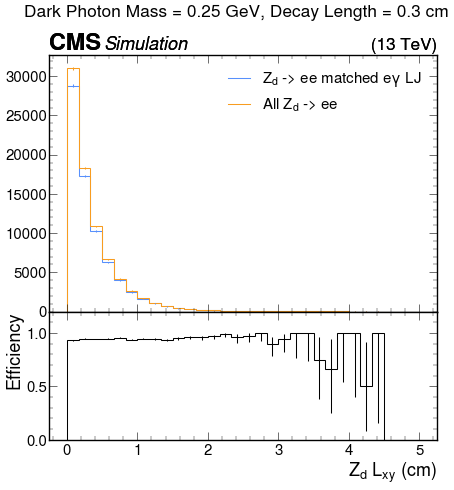

200GeV_5p0GeV_0p2mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

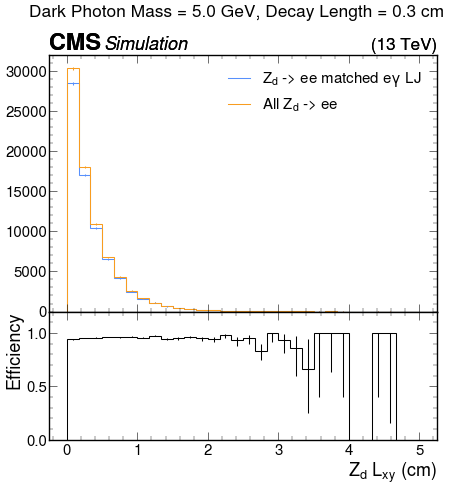

200GeV_1p2GeV_0p048mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

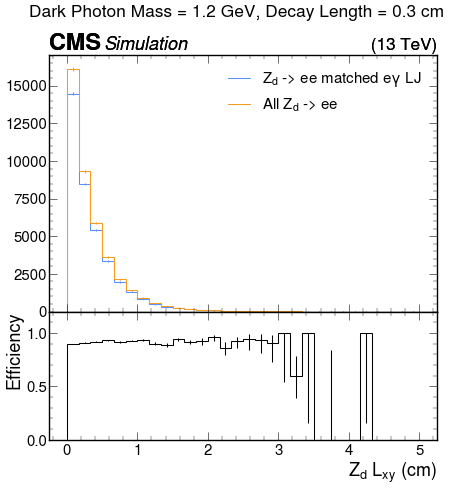

200GeV_0p25GeV_10p0mm


<Figure size 500x500 with 0 Axes>

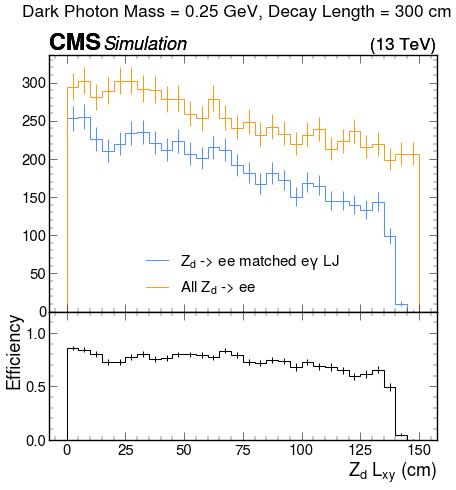

200GeV_5p0GeV_200p0mm


<Figure size 500x500 with 0 Axes>

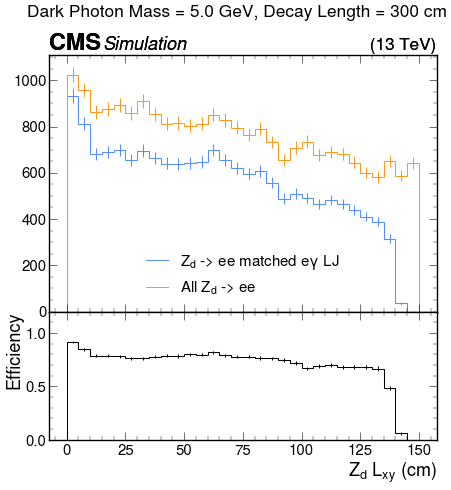

200GeV_0p25GeV_5p0mm


<Figure size 500x500 with 0 Axes>

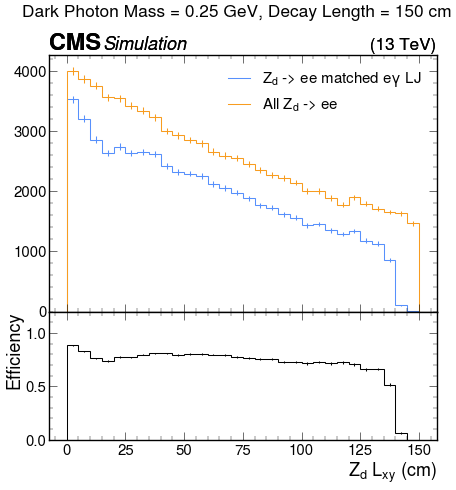

200GeV_5p0GeV_100p0mm


<Figure size 500x500 with 0 Axes>

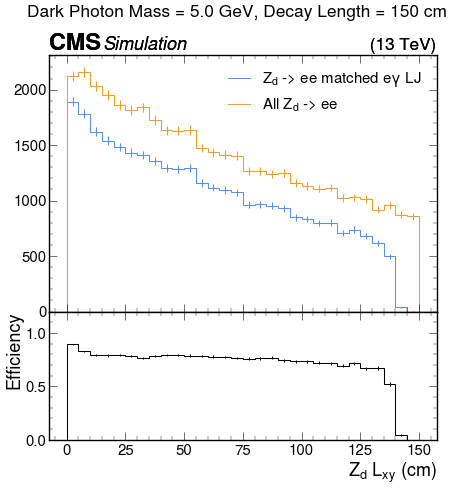

200GeV_1p2GeV_24p0mm


<Figure size 500x500 with 0 Axes>

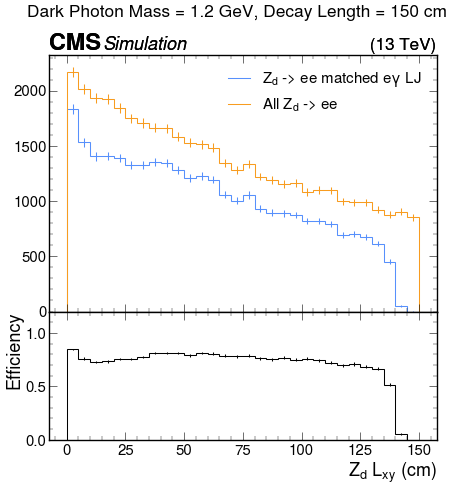

200GeV_1p2GeV_48p0mm


<Figure size 500x500 with 0 Axes>

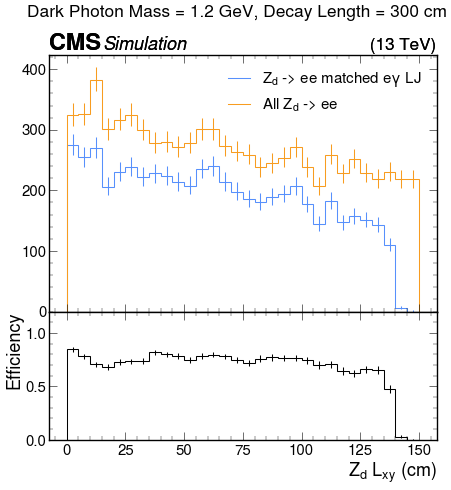

<Figure size 500x500 with 0 Axes>

In [12]:
## setting a new directory to save these plots
path = './genARatiosLooseIDs'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
for i, sample in enumerate(samplesLowLxy):
    
    print(f'{legendEntriesLowLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genAs_toE_matched_egmLj_lxy_lowRange'][channels[1], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[1], :], legend=['$Z_d$ -> ee matched e$\gamma$ LJ','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Lxy_{sample}_Relaxed.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

for i, sample in enumerate(samplesHighLxy):
    
    print(f'{legendEntriesHighLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genAs_toE_matched_egmLj_lxy'][channels[1], :], out[sample]["hists"]["genAs_toE_lxy"][channels[1], :], legend=['$Z_d$ -> ee matched e$\gamma$ LJ','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Lxy_{sample}_Relaxed.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

## The weird $L_{xy}$ behavior has been resolved!
## Lets take a look now at the momentum estimation given these new cuts

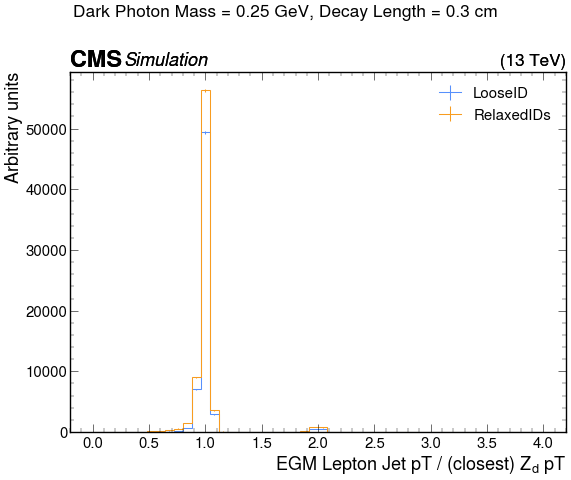

<Figure size 500x500 with 0 Axes>

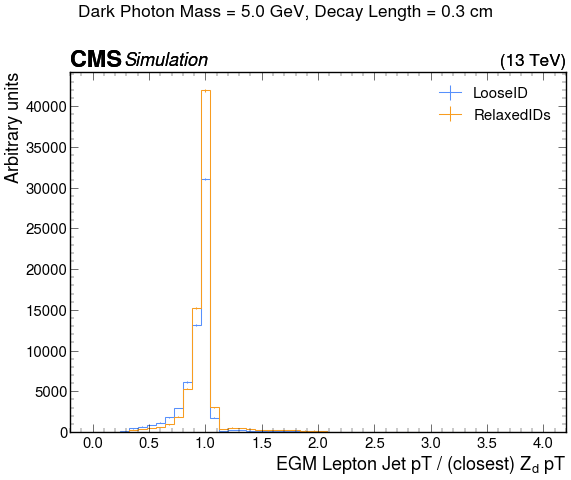

<Figure size 500x500 with 0 Axes>

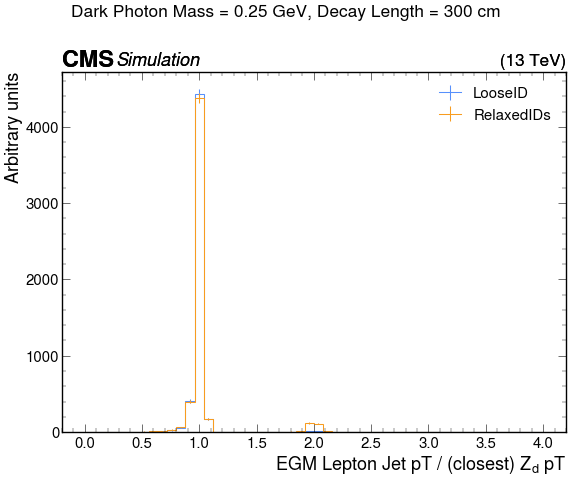

<Figure size 500x500 with 0 Axes>

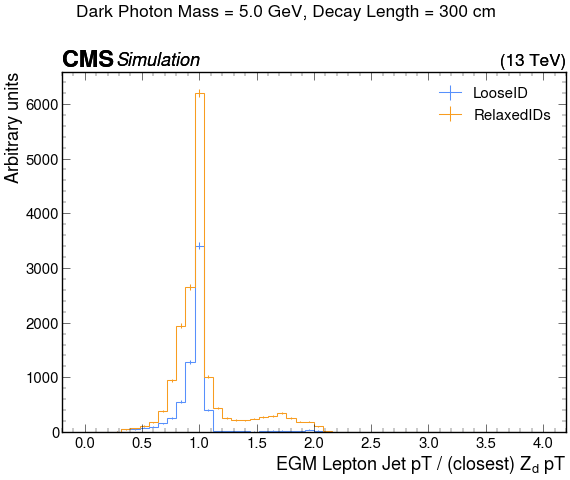

<Figure size 500x500 with 0 Axes>

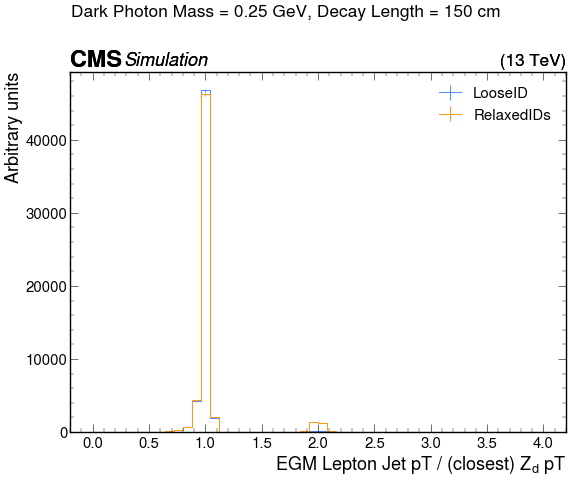

<Figure size 500x500 with 0 Axes>

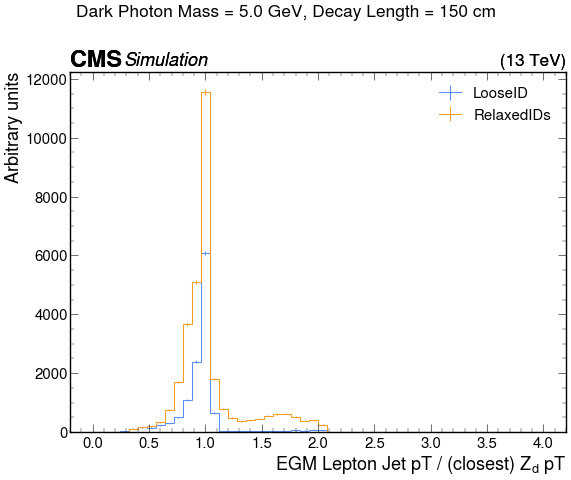

<Figure size 500x500 with 0 Axes>

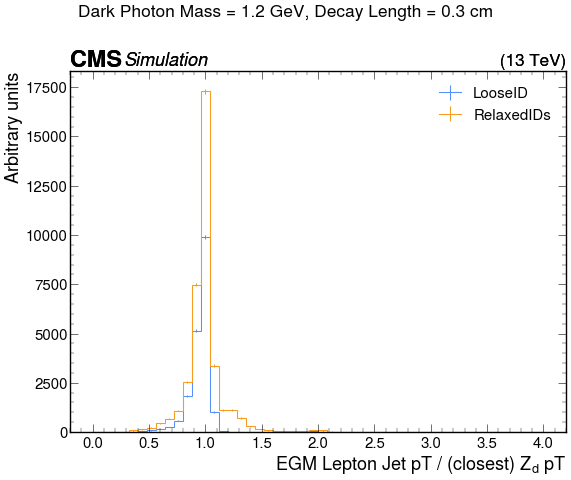

<Figure size 500x500 with 0 Axes>

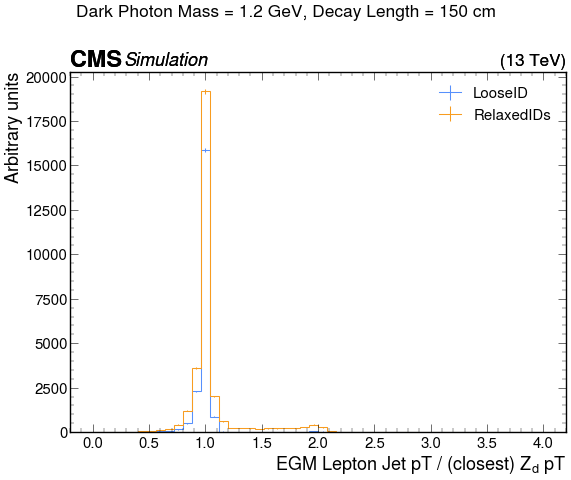

<Figure size 500x500 with 0 Axes>

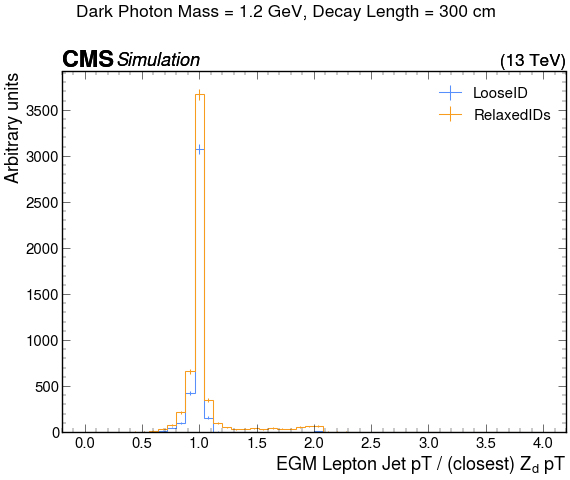

<Figure size 500x500 with 0 Axes>

In [13]:
nplots = 1

path = './momentumEstimation-Relaxed'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon


for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[0], :], density=False, label='LooseID')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[1], :], density=False, label='RelaxedIDs')
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    # Get the current axes object
    ax = plt.gca()

    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.tight_layout()  
    plt.savefig(f'{path}/plot_ljMomentum_ratios_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

## There still seems to be some double counting
## Lets take a look at different categories of EGM LJs to see where this is coming from
## We see the double counting mainly in the 1 E 1 P type EGM LJ

<>:12: DeprecationWarning: invalid escape sequence '\g'


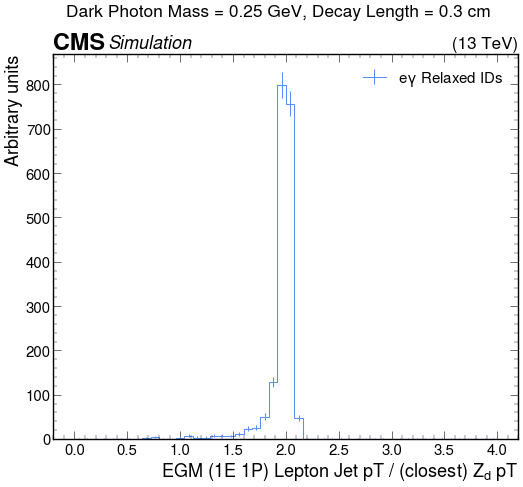

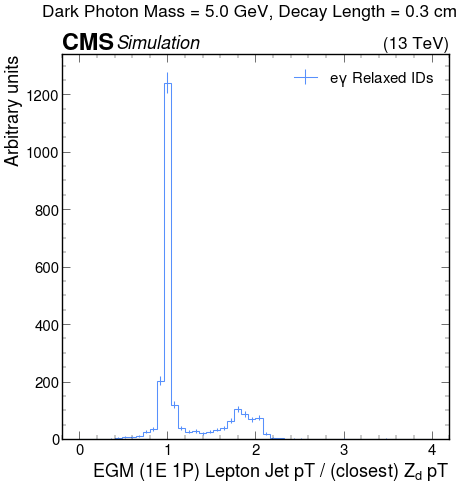

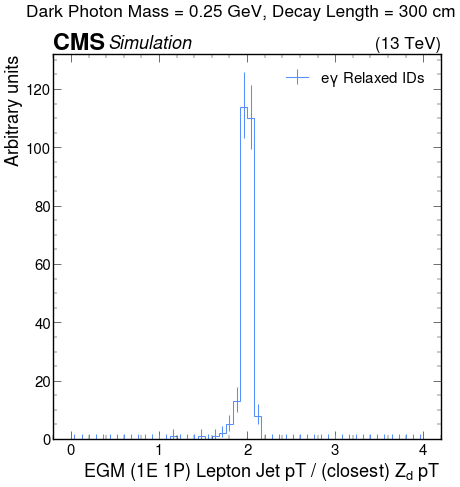

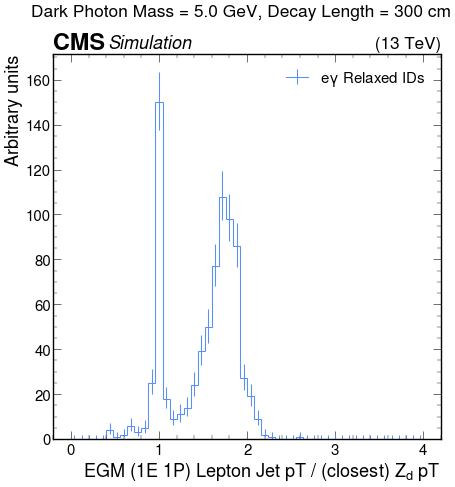

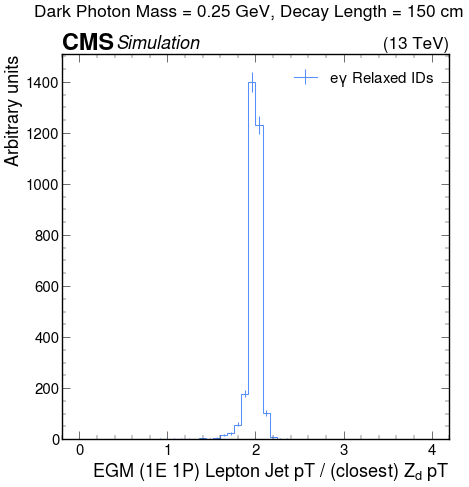

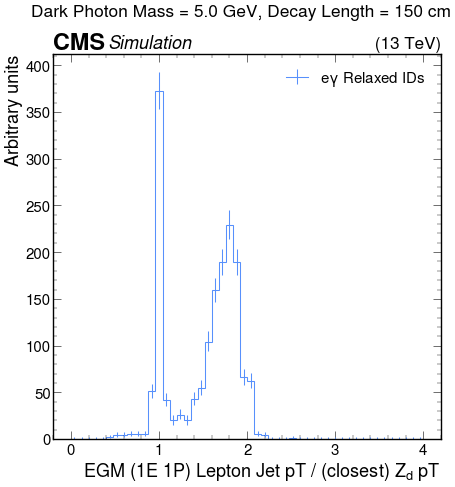

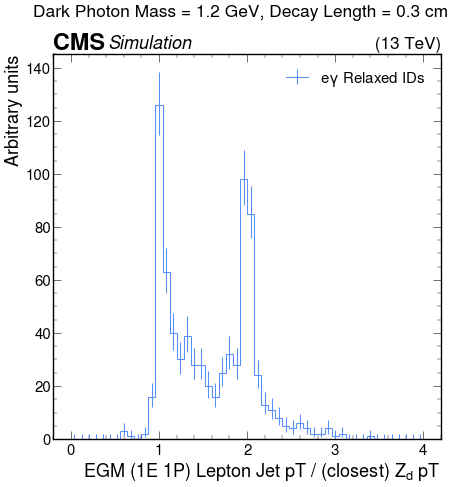

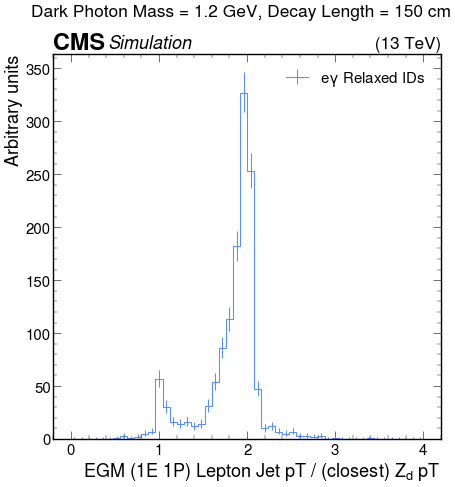

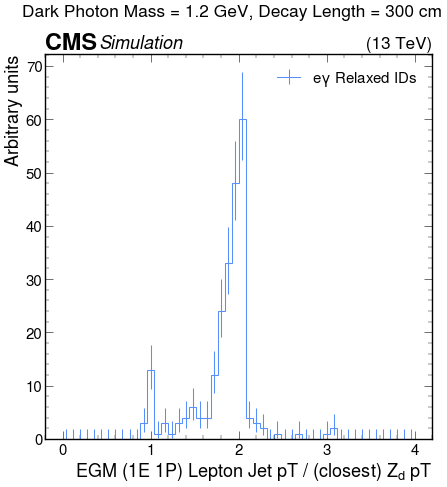

<Figure size 500x500 with 0 Axes>

In [14]:
nplots = 1
legend_entries = [s[6:] for s in samples]
path = './momentumEstimation-CategoriesSummary'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))
for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_oneEoneP"][channels[1], :], density=False, label='$e\gamma$ Relaxed IDs')
    
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    
    plt.savefig(f'{path}/plot_ljMomentum_ratios_oneEoneP_{legend_entries[i]}_EV.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

## If we look at the $\Delta R(e,p)$ in these jets
## maybe we can find a $\Delta R$ threshold to clean up these jets

<>:16: DeprecationWarning: invalid escape sequence '\D'


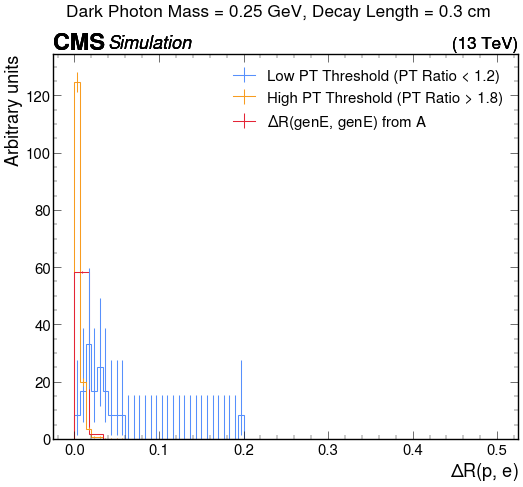

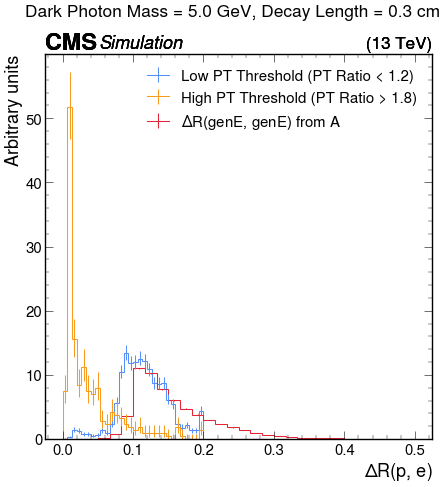

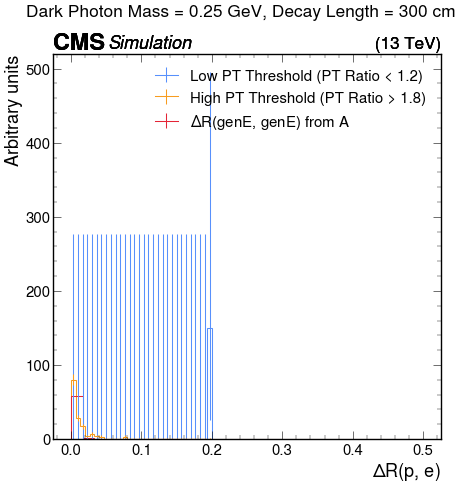

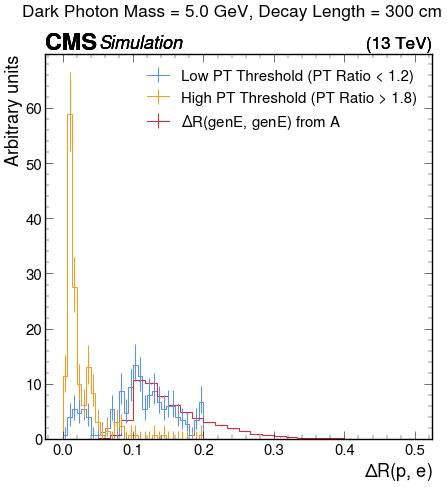

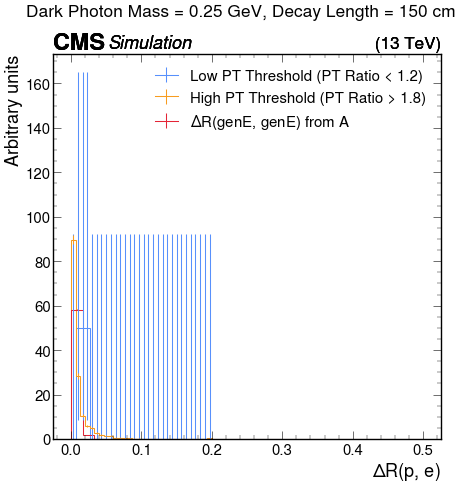

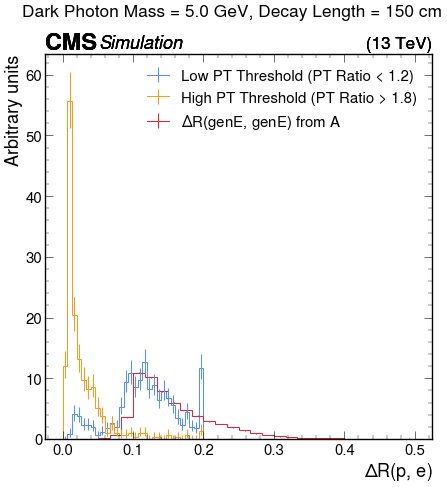

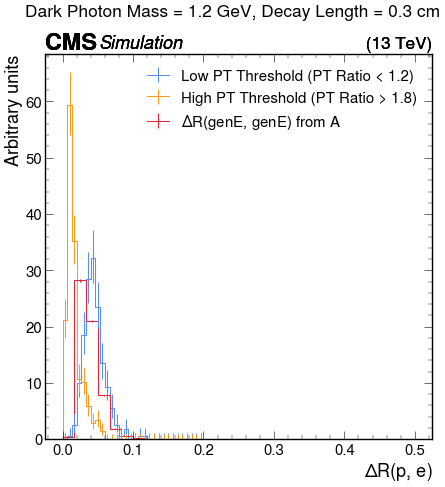

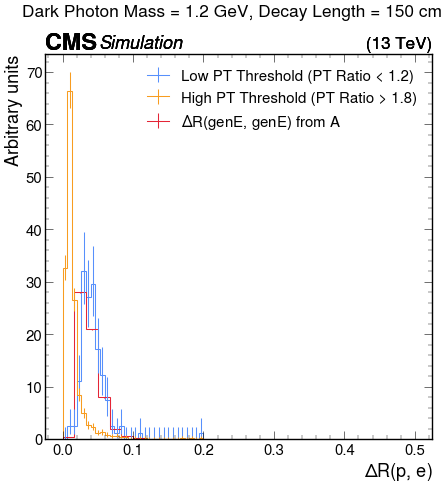

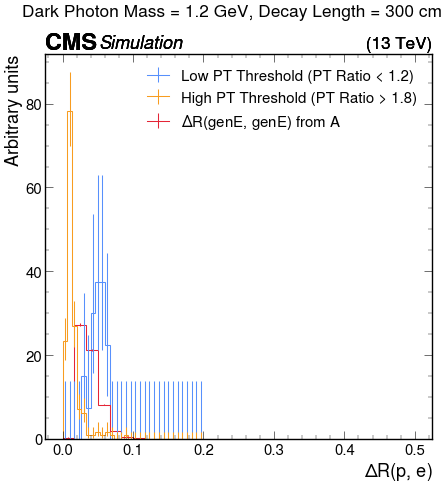

<Figure size 500x500 with 0 Axes>

In [15]:
nplots = 1
legend_entries = [s[6:] for s in samples]
path = './oneEonePLJ-electronPhotonDR'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon
plt.subplots(1, nplots, figsize=(nplots*12, 10))

for i, sample in enumerate(samples):
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    
    utilities.plot(out[sample]["hists"]["photon_electron_dR_from_oneEonePLJ_lowThreshold"][channels[1], :], density=True, label='Low PT Threshold (PT Ratio < 1.2)')
    utilities.plot(out[sample]["hists"]["photon_electron_dR_from_oneEonePLJ_highThreshold"][channels[1], :], density=True, label='High PT Threshold (PT Ratio > 1.8)')
    utilities.plot(out[sample]["hists"]["genE_genE_dR"][channels[1], :], density=True, label='$\Delta$R(genE, genE) from A')
    #utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio_onePhoton"][channels[3], :], density=False, label='$e\gamma$ LJ Neither')
    
    plt.legend(alignment="left")
    plt.ylabel("Arbitrary units")
    
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    #plt.show()
    plt.savefig(f'{path}/ElectronPhotonDR_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

## it looks like a $\Delta R$ cut of 0.025 will help clean up these jets
## here is what the final momentum estimation looks like after we apply all the cuts

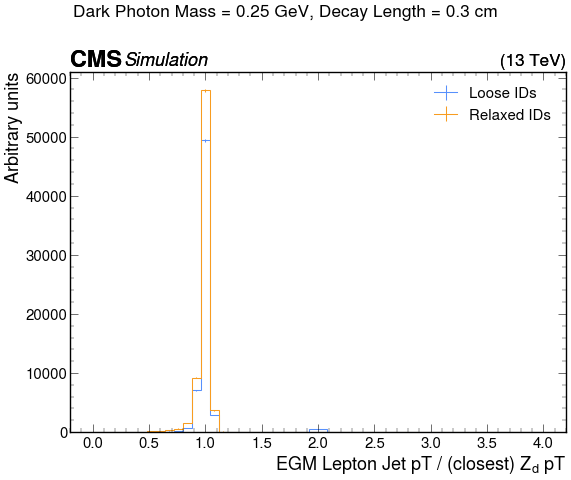

<Figure size 500x500 with 0 Axes>

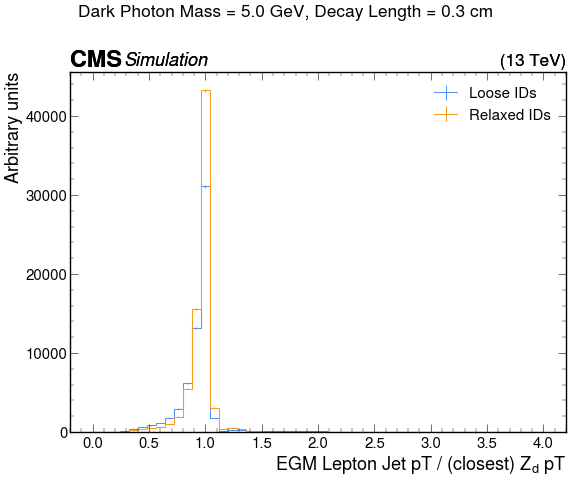

<Figure size 500x500 with 0 Axes>

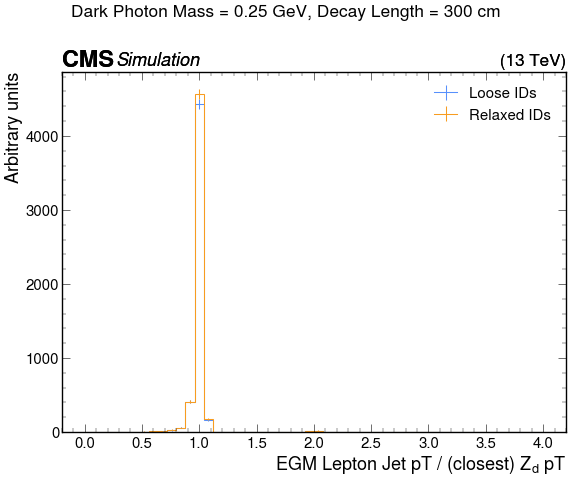

<Figure size 500x500 with 0 Axes>

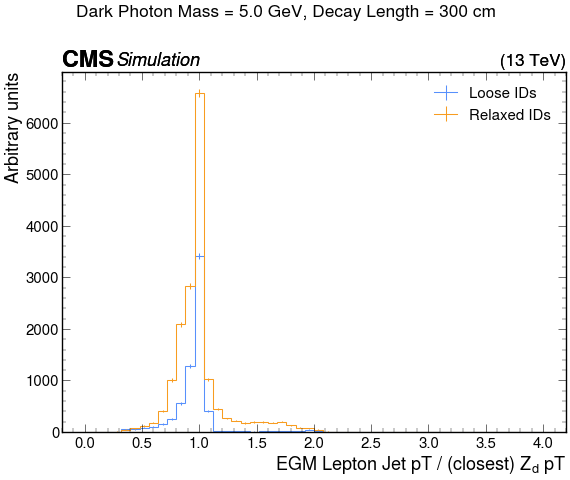

<Figure size 500x500 with 0 Axes>

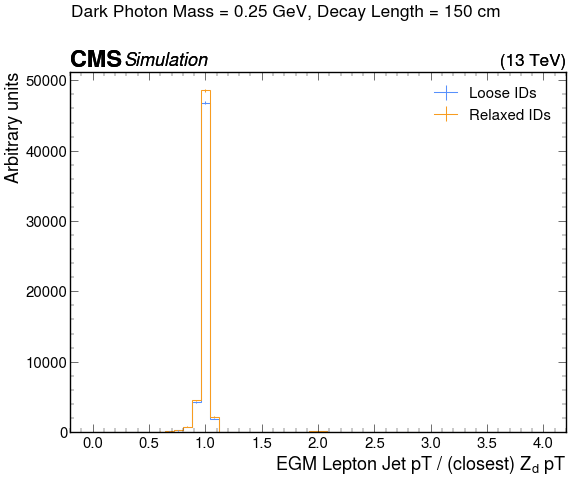

<Figure size 500x500 with 0 Axes>

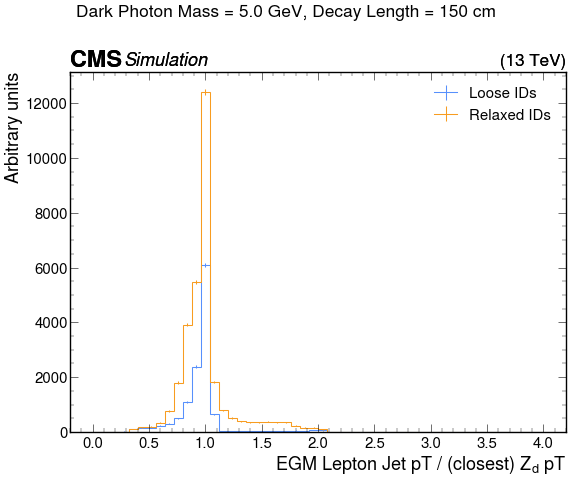

<Figure size 500x500 with 0 Axes>

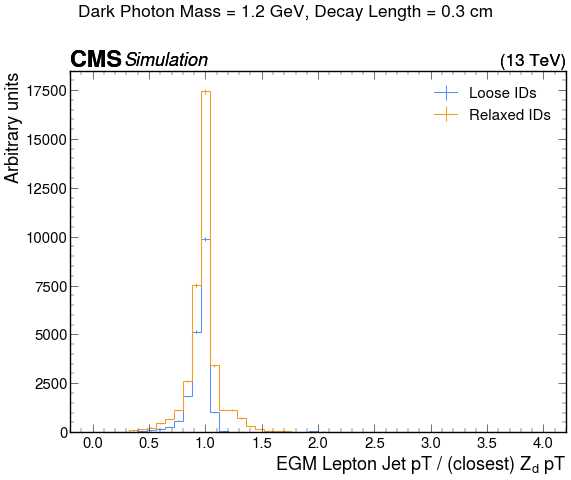

<Figure size 500x500 with 0 Axes>

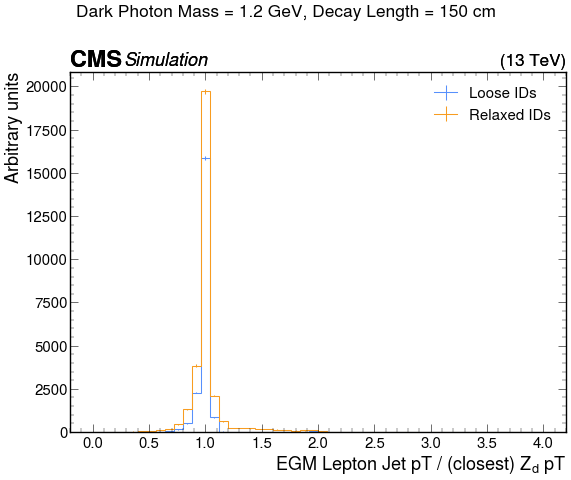

<Figure size 500x500 with 0 Axes>

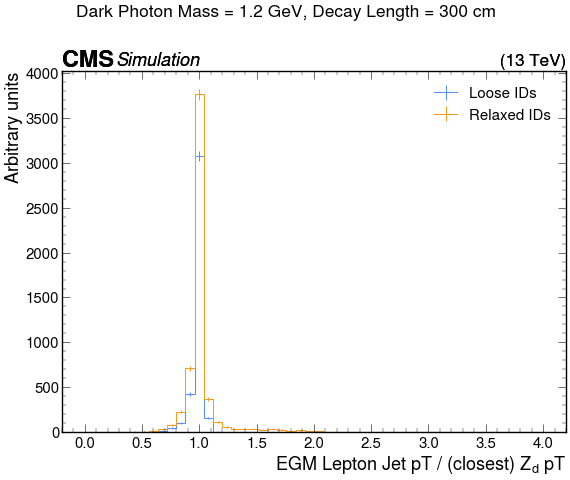

<Figure size 500x500 with 0 Axes>

In [16]:
nplots = 1

path = './momentumEstimation-FINAL'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
# number of electrons near dark photon


for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[0], :], density=False, label='Loose IDs')
    utilities.plot(out[sample]["hists"]["genA_egmLj_ptRatio"][channels[2], :], density=False, label='Relaxed IDs')

    
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    # Apply tight layout to ensure space for the legend
    plt.tight_layout()  # Adjust the right side to make room for the legend
    plt.savefig(f'{path}/plot_ljMomentum_ratios_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()

## Finally we can look at the nElectrons and nPhotons near our $Z_d$ with the new selection

/tmp/ipykernel_5744/3313518326.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_5744/3313518326.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)


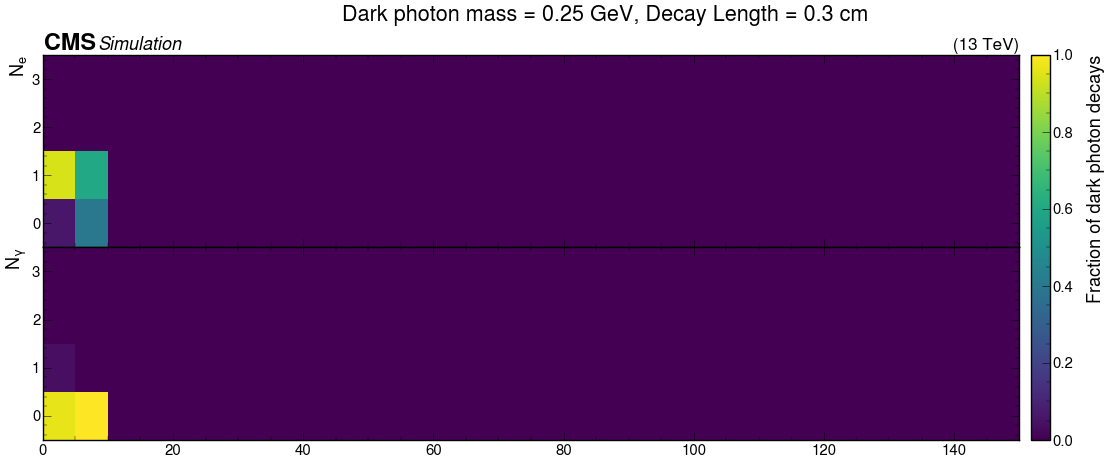

/tmp/ipykernel_5744/3313518326.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_5744/3313518326.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)


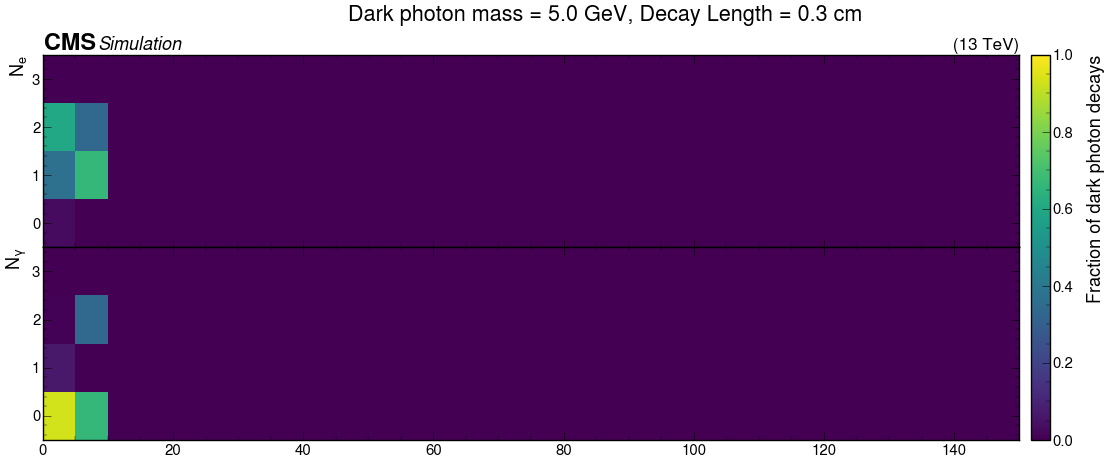

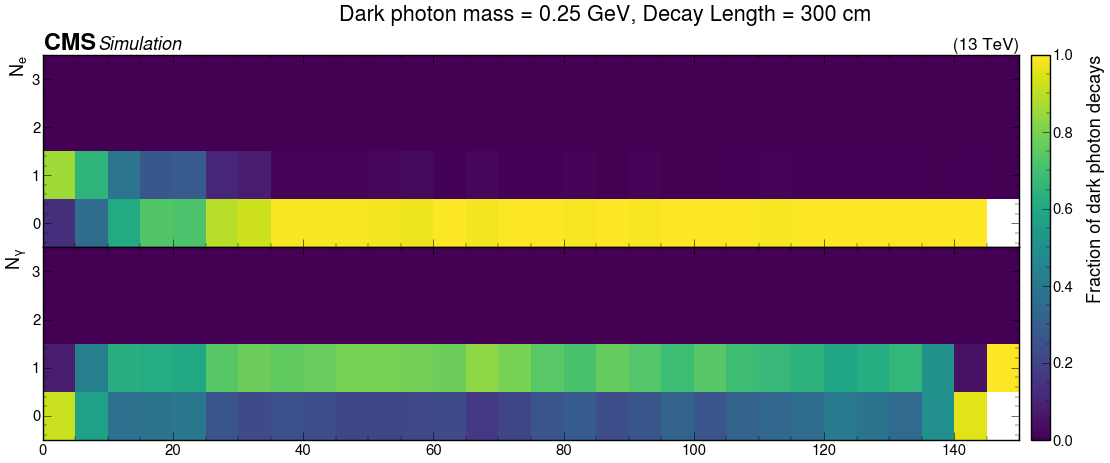

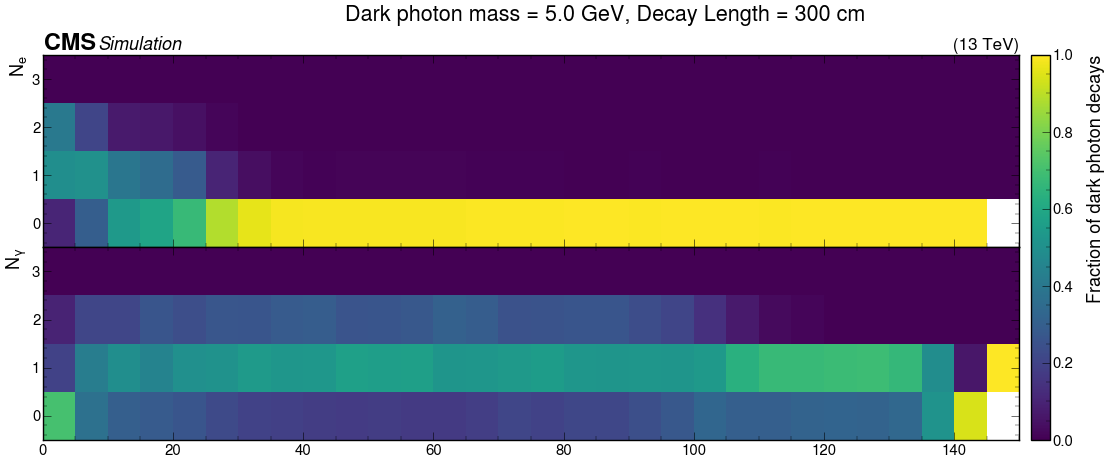

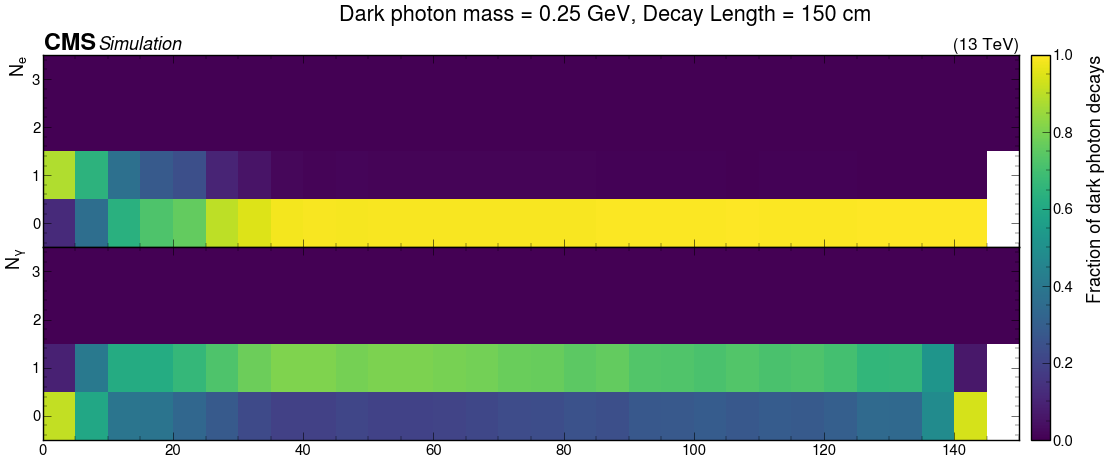

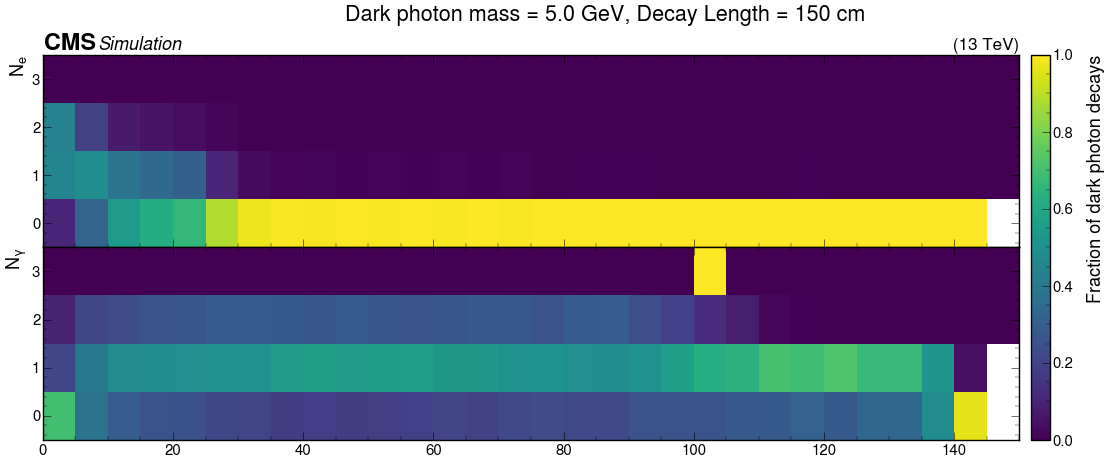

/tmp/ipykernel_5744/3313518326.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)
/tmp/ipykernel_5744/3313518326.py:5: RuntimeWarning: divide by zero encountered in divide
  weights = 1/np.sum(h.values(), axis=-1)


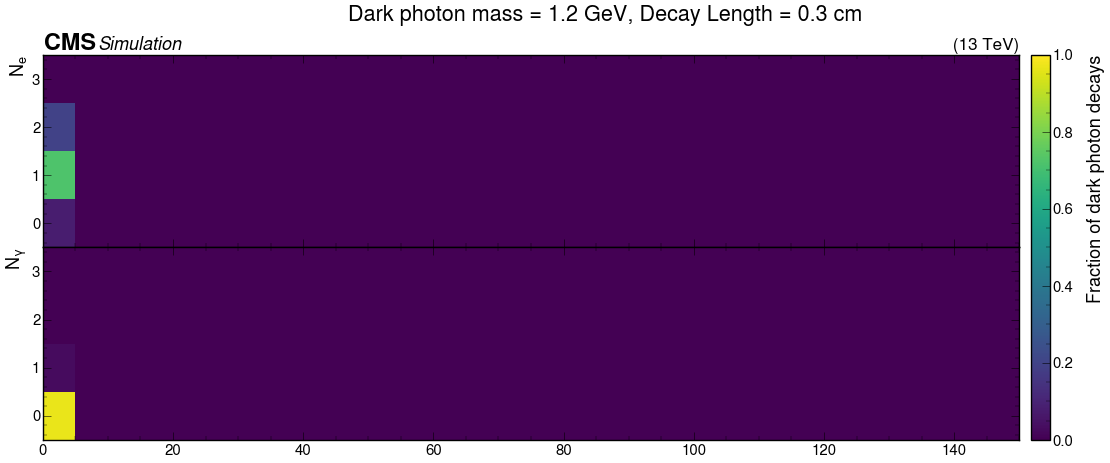

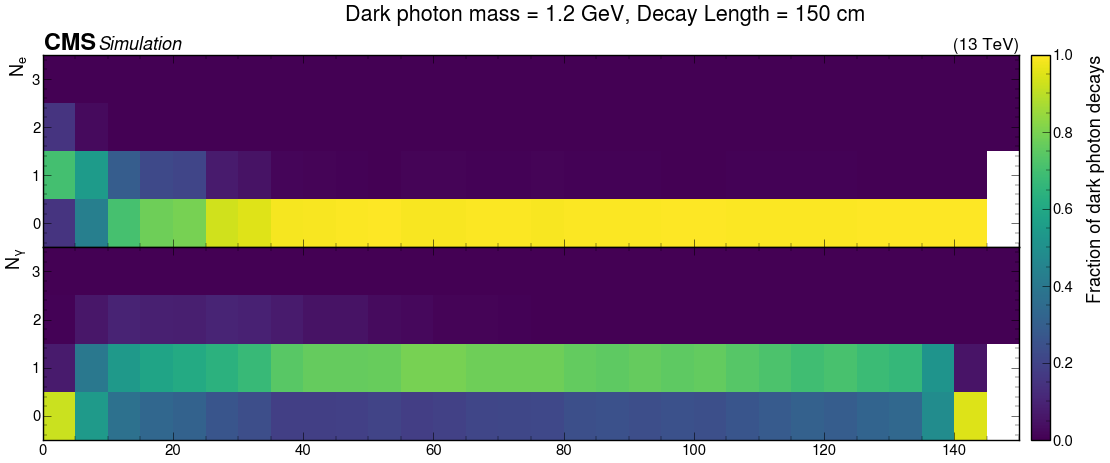

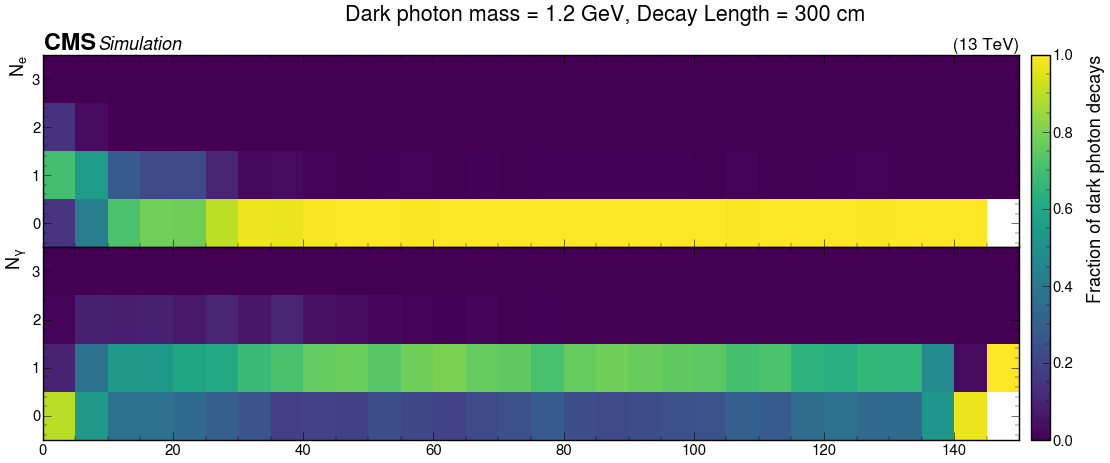

In [17]:
## SKIP THIS FOR NOW 
import numpy as np

def make_eff(h):
    weights = 1/np.sum(h.values(), axis=-1)
    weights = np.nan_to_num(weights)
    for ix in range(h.shape[1]):
        h[:, ix] = np.column_stack([h.values()[:, ix]*weights, h.variances()[:, ix]*weights])
    return h

def plot_single(h, vmax, eff, channel, skip_label=True, remove_xlabel=True):
    h = h[channels[channel], :, :]
    if eff:
        h = make_eff(h)
    utilities.plot(h[:400j, :], skip_label=skip_label, cmax=vmax, cbar=False)
    if remove_xlabel:
        plt.xlabel(None)
    plt.draw()
    

def plot_all_vs_lxy(proc_output, sample, vmax=1000, eff=True, suffix="", channel = 2):
    vmax = 1 if eff else vmax

    fig, ax = plt.subplots(2, 1, figsize=(30, 10), sharex=True)
    plt.subplot(2, 1, 1)
    plot_single(proc_output[sample]["hists"]["electron_nearGenA_n_genA_lxy"], eff, vmax, skip_label=False, channel=channel)
    plt.subplot(2, 1, 2)
    plot_single(proc_output[sample]["hists"]["photon_nearGenA_n_genA_lxy"], eff, vmax, channel)
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = stringReplace(sample.split('_')[-1]).split('m')[0]
    fig.subplots_adjust(hspace=0)
    bs_mass, dp_mass = sample.split("_")[1:3]
    decay_ln = returnLxy(sample.split('_')[-1][:-2])
    dp_mass = dp_mass.replace("p", ".")
    fig.suptitle(f"Dark photon mass = {mass} GeV, Decay Length = {decay_ln}")
    cb = fig.colorbar(plt.gca().collections[0], ax=ax.ravel().tolist(), pad=0.01)
    cb.set_label("Fraction of dark photon decays", labelpad=20)
    plt.show()
    #plt.savefig(f"../../plots/lepton_reco_vs_lxy_{sample}{suffix}.png", bbox_inches="tight")

plot_all_vs_lxy(out, '2Mu2E_200GeV_0p25GeV_0p01mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_5p0GeV_0p2mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_0p25GeV_10p0mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_5p0GeV_200p0mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_0p25GeV_5p0mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_5p0GeV_100p0mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_1p2GeV_0p048mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_1p2GeV_24p0mm', channel = 1)
plot_all_vs_lxy(out, '2Mu2E_200GeV_1p2GeV_48p0mm', channel = 1)

## Additionally, we can look at the reco efficiency as a function of $L_{xy}$ again with all the new cuts being applied

<>:12: DeprecationWarning: invalid escape sequence '\g'
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


200GeV_0p25GeV_0p01mm


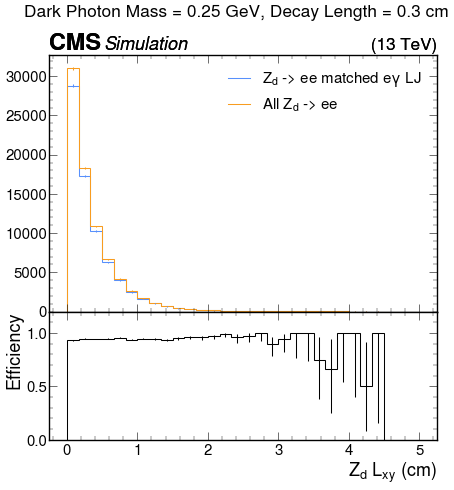

200GeV_5p0GeV_0p2mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

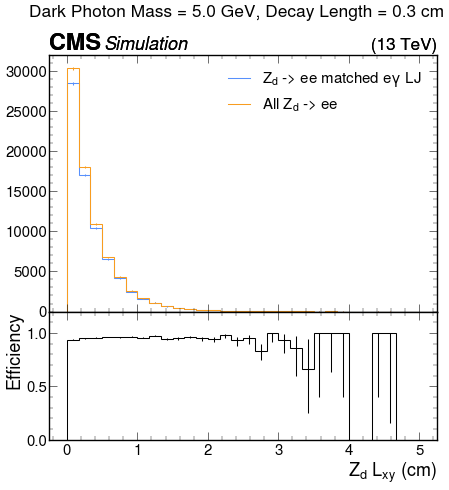

200GeV_1p2GeV_0p048mm


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:144: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals


<Figure size 500x500 with 0 Axes>

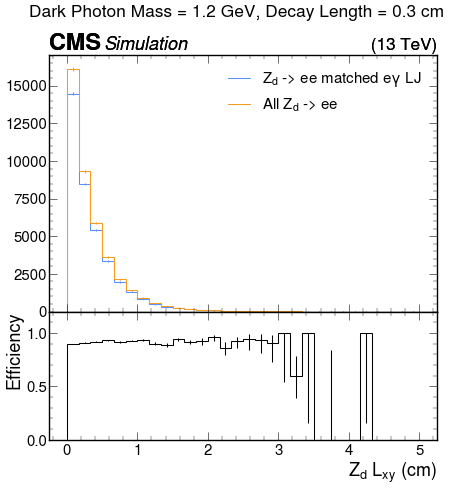

200GeV_0p25GeV_10p0mm


<Figure size 500x500 with 0 Axes>

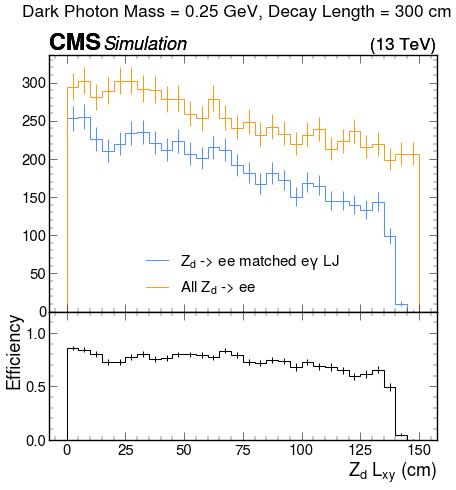

200GeV_5p0GeV_200p0mm


<Figure size 500x500 with 0 Axes>

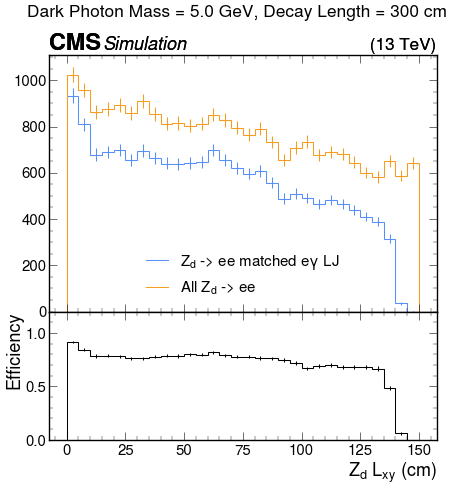

200GeV_0p25GeV_5p0mm


<Figure size 500x500 with 0 Axes>

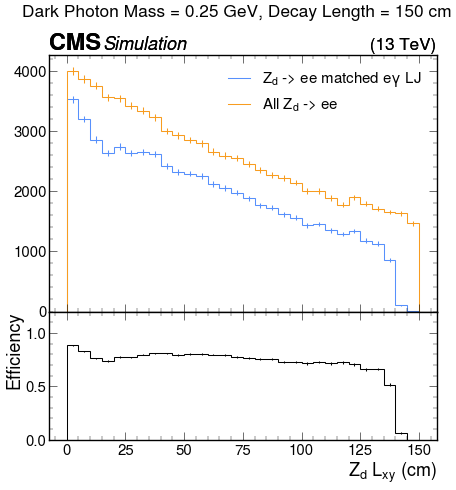

200GeV_5p0GeV_100p0mm


<Figure size 500x500 with 0 Axes>

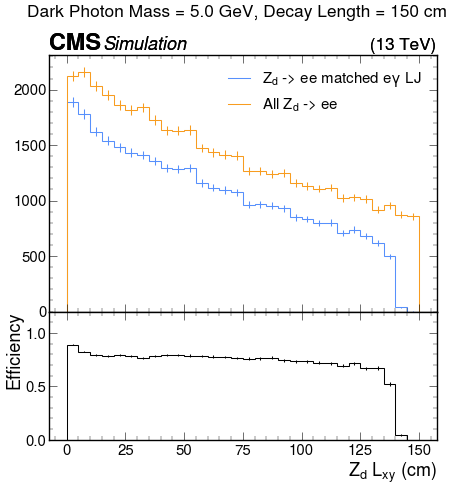

200GeV_1p2GeV_24p0mm


<Figure size 500x500 with 0 Axes>

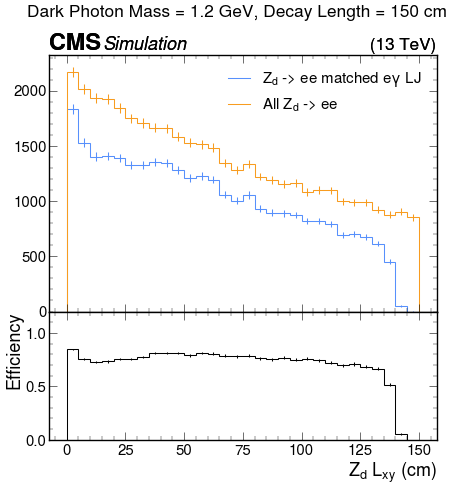

200GeV_1p2GeV_48p0mm


<Figure size 500x500 with 0 Axes>

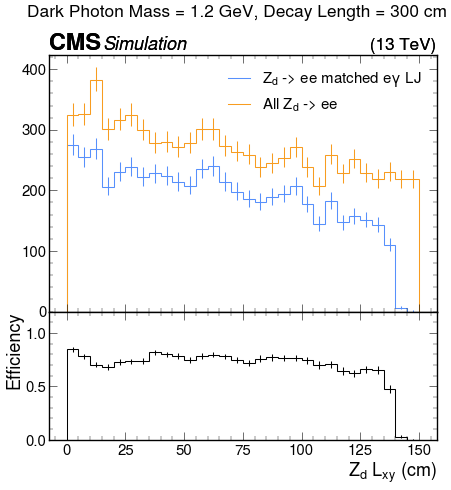

<Figure size 500x500 with 0 Axes>

In [18]:
## setting a new directory to save these plots
path = './genARatiosFINAL'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)
    
for i, sample in enumerate(samplesLowLxy):
    
    print(f'{legendEntriesLowLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genAs_toE_matched_egmLj_lxy_lowRange'][channels[2], :], out[sample]["hists"]["genAs_toE_lxy_lowRange"][channels[1], :], legend=['$Z_d$ -> ee matched e$\gamma$ LJ','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Lxy_{sample}_FINAL.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

for i, sample in enumerate(samplesHighLxy):
    
    print(f'{legendEntriesHighLxy[i]}')
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot_ratio(out[sample]["hists"]['genAs_toE_matched_egmLj_lxy'][channels[2], :], out[sample]["hists"]["genAs_toE_lxy"][channels[1], :], legend=['$Z_d$ -> ee matched e$\gamma$ LJ','All $Z_d$ -> ee'])
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    plt.savefig(f'{path}/ratio_Lxy_{sample}_FINAL.png', facecolor='w', dpi=300)
    plt.show()
    plt.clf()

## As well as our $m_{LJ-LJ}$ handle

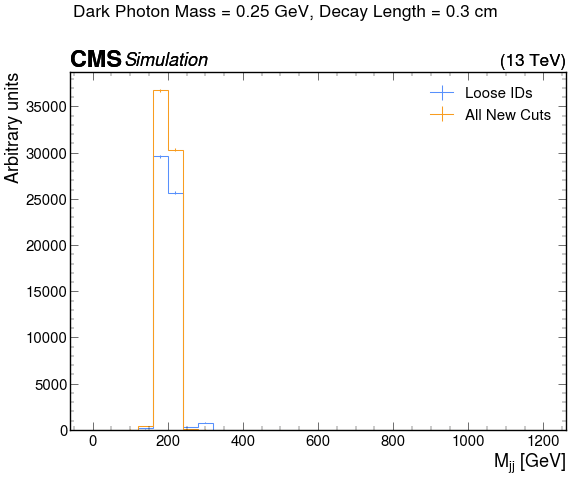

<Figure size 500x500 with 0 Axes>

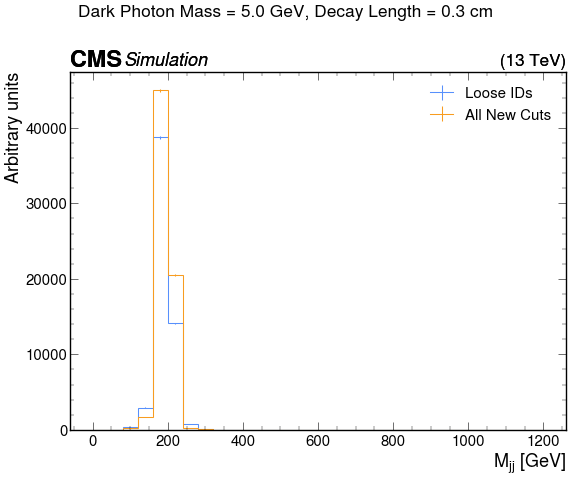

<Figure size 500x500 with 0 Axes>

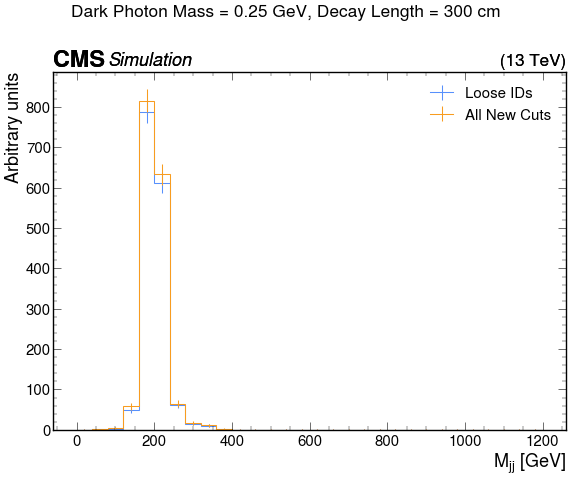

<Figure size 500x500 with 0 Axes>

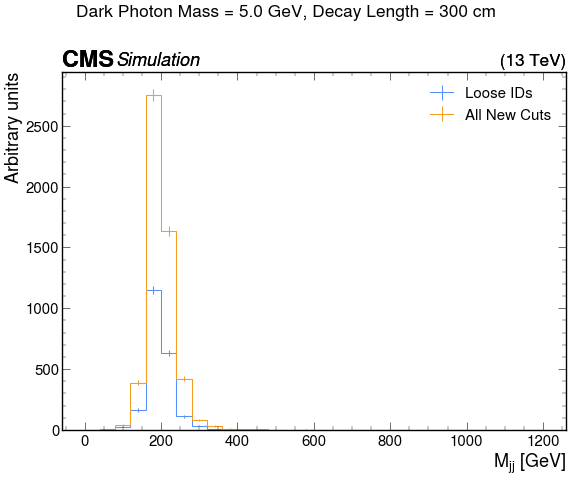

<Figure size 500x500 with 0 Axes>

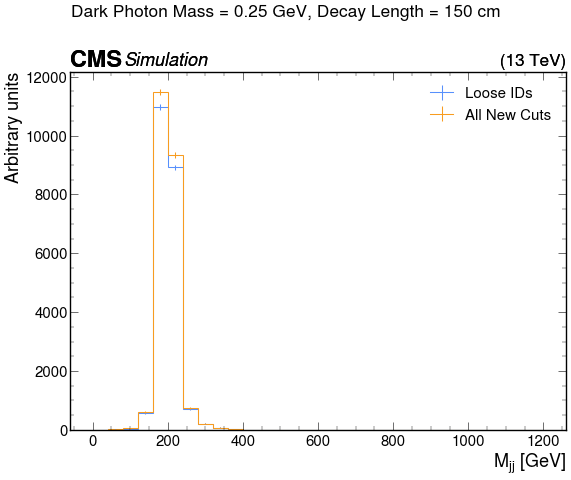

<Figure size 500x500 with 0 Axes>

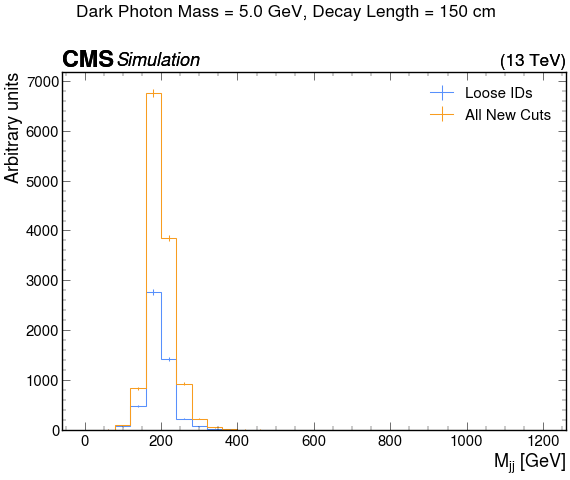

<Figure size 500x500 with 0 Axes>

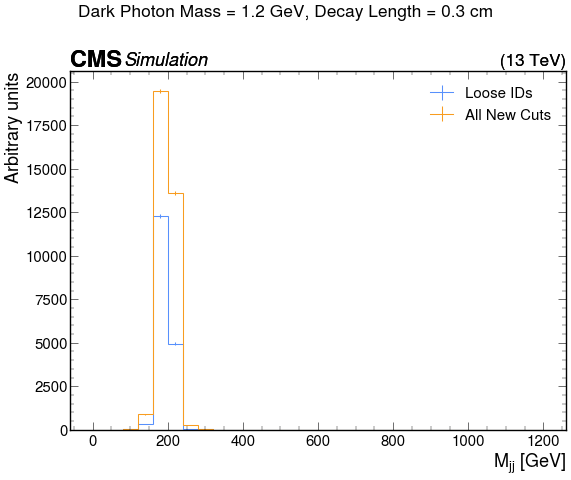

<Figure size 500x500 with 0 Axes>

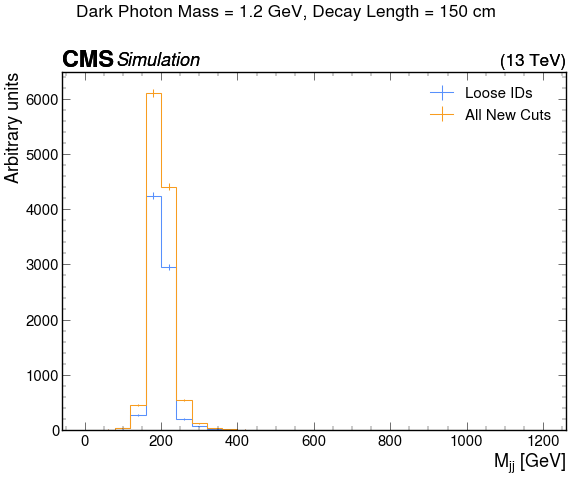

<Figure size 500x500 with 0 Axes>

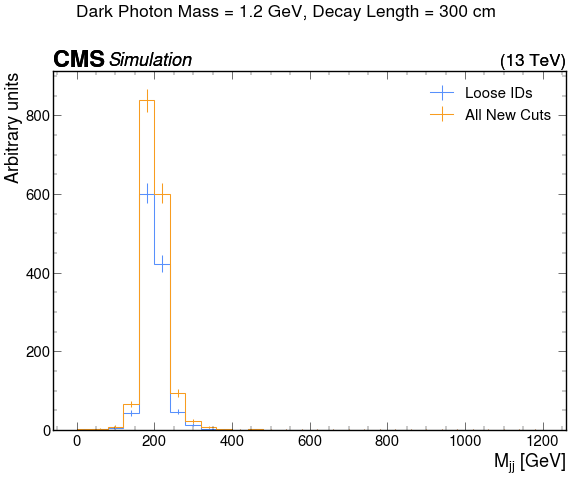

<Figure size 500x500 with 0 Axes>

In [19]:
nplots = 1

path = './invariantMassPlot'
# Check if the directory already exists
if not os.path.exists(path):
    os.mkdir(path)



for i, sample in enumerate(samples):
    plt.subplots(1, nplots, figsize=(12, 10))
    mass = stringReplace(sample.split('_')[2]).split('G')[0]
    decayLen = returnLxy(sample.split('_')[-1][:-2])
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[0], :], density=False, label='Loose IDs')
    utilities.plot(out[sample]["hists"]["mJJ_2mu2e"][channels[2], :], density=False, label='All New Cuts')
    
    plt.legend()
    plt.ylabel("Arbitrary units")
    
    plt.suptitle(f'Dark Photon Mass = {mass} GeV, Decay Length = {decayLen}', fontsize=25)
    # Apply tight layout to ensure space for the legend
    plt.tight_layout()  # Adjust the right side to make room for the legend
    plt.savefig(f'{path}/plot_LJ_invariant_mass_{legend_entries[i]}.png', dpi=300, facecolor='w')
    plt.show()
    plt.clf()
